 What are the predicted releases from oil sand facilities in 5 years? Alternatively, what are the predicted releases or disposals from other important industrial and institutional sectors such as mining, manufacturing, electricity generation, and sewage treatment in the next 5 years?


In [ ]:
# importing libraries
import pandas as pd
import numpy as np


In [ ]:
# considering df as dataframe and use pandas to read file
df = pd.read_csv('NPRI_Data_2022_unclean.csv')

In [ ]:
df.head()

IssueID  ReportID  Priority IssueType  ReportYear  NpriID  \
0    57733    335210         6     Trend        2022   11017   
1    57740    335213         6     Trend        2022   10979   
2    57745    335213         6     Trend        2022   10979   
3    57746    335213         6     Trend        2022   10979   
4    57765    335221         6     Trend        2022   24231   

                           CompanyName     FacilityName   NAICS  \
0               City of Kawartha Lakes     Lindsay WPCP  221320   
1                   City of Owen Sound  Owen Sound WPCP  221320   
2                   City of Owen Sound  Owen Sound WPCP  221320   
3                   City of Owen Sound  Owen Sound WPCP  221320   
4  Heidelberg Materials Canada Limited   Glacier Quarry  212323   

             Category  ... DifferenceChange FourYearAvg NAICSSubstanceAvg  \
0               Water  ...          17.1000   24.167500        726.020055   
1  DisposalsTransfers  ...           9.9803   15.924000        106.904767   
2               Water  ...          -8.7418    2.762950        264.082095   
3               Water  ...          -3.9187    1.305175         28.126980   
4                 Air  ...           3.9710    7.035500         25.332596   

  NumStandardDeviation  StandardDeviation  NAICSSubstanceCount  \
0            -0.355612        1929.857872                  101   
1            -0.226340         379.694303                  105   
2            -0.312018         846.184135                  166   
3            -0.377584          74.431036                  149   
4            -0.220763          78.027725                  118   

   NAICSSubstanceTotal  OverallSubstanceTotal  NumOfEmployees  \
0         73328.025600           81561.568318               5   
1         11225.000530           33430.126126               6   
2         43837.627693           46252.286544               6   
3          4190.920093            5418.433552               6   
4          2989.246371          493869.654799              16   

                                   SubstanceComments  
0  Nature of activities results in annual variati...  
1  Nature of treating wastewater changes daily. T...  
2  Quantities change year to year due to the natu...  
3  Nature of treating wastewater changes daily. t...  
4                                                NaN  

[5 rows x 30 columns]

In [ ]:
# checking the data type of features
df.dtypes

IssueID                    int64
ReportID                   int64
Priority                   int64
IssueType                 object
ReportYear                 int64
NpriID                     int64
CompanyName               object
FacilityName              object
NAICS                      int64
Category                  object
Sub-Category              object
Cas                       object
SubstanceName             object
Units                     object
CurrentYear              float64
YearMinus1               float64
YearMinus2               float64
YearMinus3               float64
YearMinus4               float64
PercentChange            float64
DifferenceChange         float64
FourYearAvg              float64
NAICSSubstanceAvg        float64
NumStandardDeviation     float64
StandardDeviation        float64
NAICSSubstanceCount        int64
NAICSSubstanceTotal      float64
OverallSubstanceTotal    float64
NumOfEmployees             int64
SubstanceComments         object
dtype: obj

In [ ]:
# checking the shape of our dataframe
df.shape

(14818, 30)

In [ ]:
#making copy of dataframe to apply diffrent methods for cleaning dataset
df_clean = df.copy()

#removing duplicate rows dataframe if we have any
df_clean.duplicated()
df_clean.drop_duplicates(inplace=True)

In [ ]:
df_clean.shape

(14818, 30)

In [ ]:
# checking how many unique values we have in each column
df.nunique()

IssueID                  14818
ReportID                  3328
Priority                     9
IssueType                    3
ReportYear                   1
NpriID                    3326
CompanyName               1196
FacilityName              3289
NAICS                      225
Category                     8
Sub-Category                13
Cas                        197
SubstanceName              197
Units                        4
CurrentYear              11071
YearMinus1               10817
YearMinus2                8425
YearMinus3                7134
YearMinus4                6400
PercentChange            12575
DifferenceChange         12409
FourYearAvg              12497
NAICSSubstanceAvg         3674
NumStandardDeviation     13238
StandardDeviation         3057
NAICSSubstanceCount        132
NAICSSubstanceTotal       3650
OverallSubstanceTotal      526
NumOfEmployees             493
SubstanceComments         2138
dtype: int64

In [ ]:
# dropping columns which we do not need in our dataset
columns_to_drop = ['ReportYear','SubstanceComments','Priority','CompanyName','IssueType','FourYearAvg','NumStandardDeviation','StandardDeviation','Sub-Category','IssueID','ReportID']
df_clean.drop(columns=columns_to_drop,inplace=True)

In [ ]:
# checking missing values in each column
df_clean.isna().sum()

NpriID                      0
FacilityName                0
NAICS                       0
Category                    0
Cas                         0
SubstanceName               0
Units                       0
CurrentYear                 0
YearMinus1                108
YearMinus2               2664
YearMinus3               4156
YearMinus4               5181
PercentChange             110
DifferenceChange            0
NAICSSubstanceAvg           0
NAICSSubstanceCount         0
NAICSSubstanceTotal         0
OverallSubstanceTotal       0
NumOfEmployees              0
dtype: int64

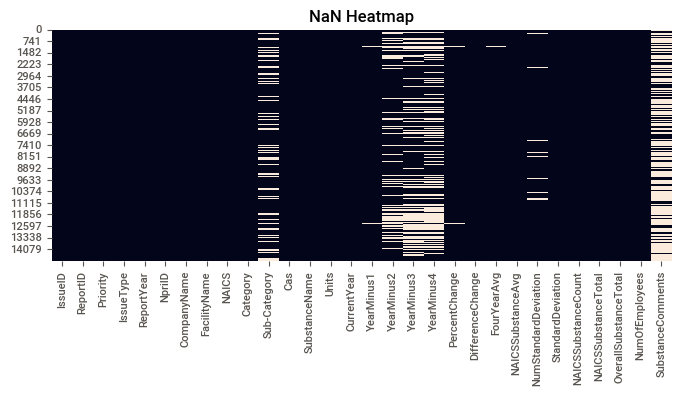

In [ ]:
#we can use this in our presentation to show missing values we have in each column instead of giving numbers
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 3))
sns.heatmap(df.isna(), cbar=False)
plt.title("NaN Heatmap")
plt.show()

In [ ]:
# using median of column percentchange to fill missing values
df_per_med = df_clean['PercentChange'].median()
df_clean['PercentChange'].fillna(df_per_med, inplace = True)

In [ ]:
#using mode to fill missing values in column yearminus1
df_mode = df_clean['YearMinus1'].mode()[0]
df_clean['YearMinus1'].fillna(df_mode, inplace = True)

In [ ]:
#using median again
df_med = df_clean['YearMinus2'].median()
df_clean['YearMinus2'].fillna(df_med, inplace = True)

In [ ]:
# using mean or average of columns to fill missing values
df_mean = df_clean['YearMinus3'].mean()
df_clean['YearMinus3'].fillna(df_mean,inplace=True)

df_mean = df_clean['YearMinus4'].mean()
df_clean['YearMinus4'].fillna(df_mean,inplace=True)

In [ ]:
# checking again if we have any missing value in any column
df_clean.isnull().sum()

NpriID                   0
FacilityName             0
NAICS                    0
Category                 0
Cas                      0
SubstanceName            0
Units                    0
CurrentYear              0
YearMinus1               0
YearMinus2               0
YearMinus3               0
YearMinus4               0
PercentChange            0
DifferenceChange         0
NAICSSubstanceAvg        0
NAICSSubstanceCount      0
NAICSSubstanceTotal      0
OverallSubstanceTotal    0
NumOfEmployees           0
dtype: int64

In [ ]:
df_clean.dtypes

NpriID                     int64
FacilityName              object
NAICS                      int64
Category                  object
Cas                       object
SubstanceName             object
Units                     object
CurrentYear              float64
YearMinus1               float64
YearMinus2               float64
YearMinus3               float64
YearMinus4               float64
PercentChange            float64
DifferenceChange         float64
NAICSSubstanceAvg        float64
NAICSSubstanceCount        int64
NAICSSubstanceTotal      float64
OverallSubstanceTotal    float64
NumOfEmployees             int64
dtype: object

In [ ]:
#checking unique values in units column
df_clean['Units'].unique()

array(['tonnes', 'kg', 'g_teq_et', 'grams'], dtype=object)

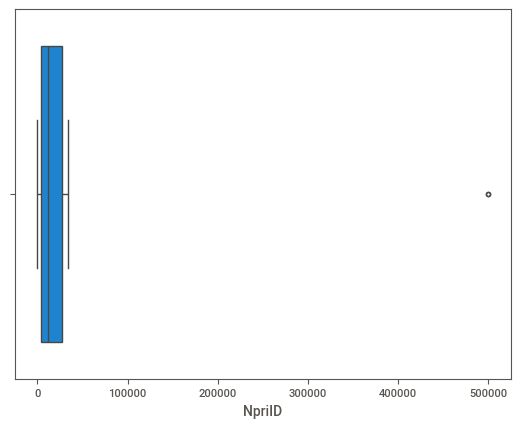

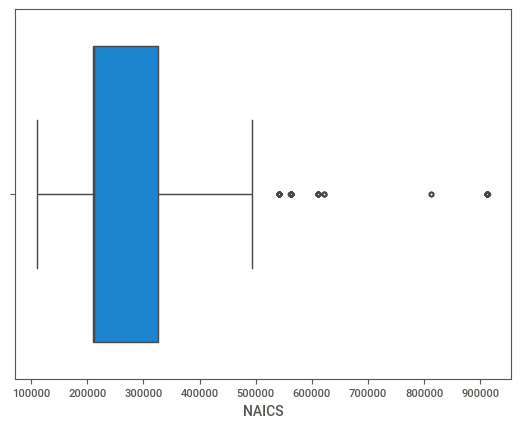

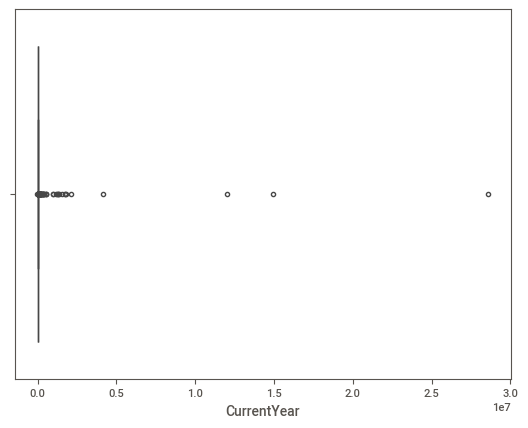

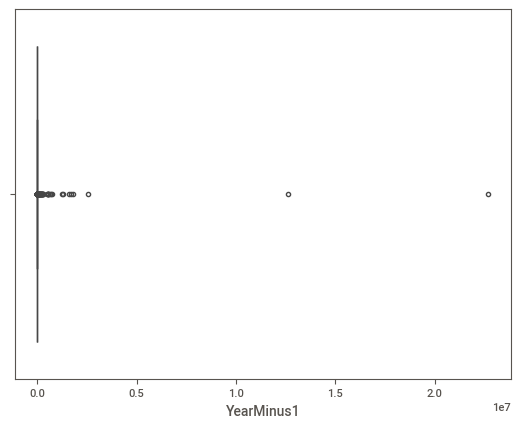

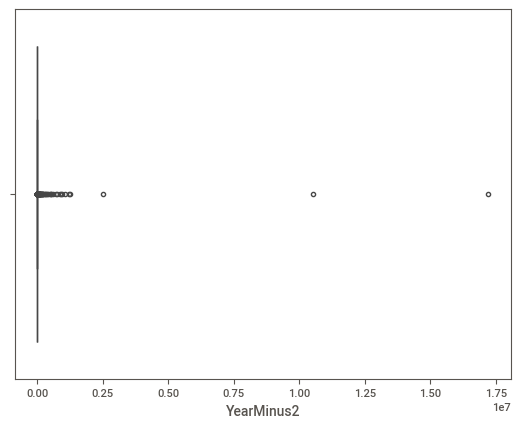

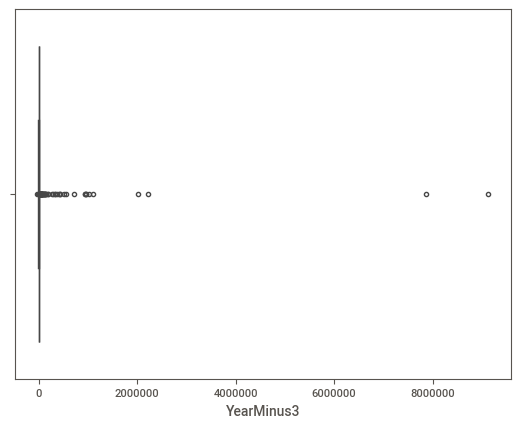

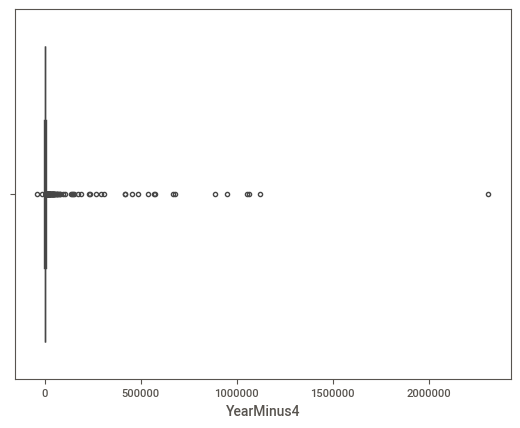

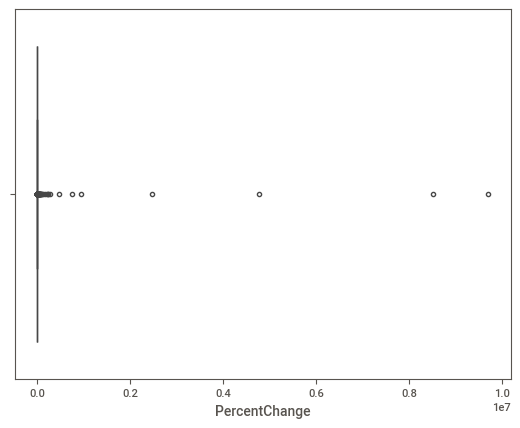

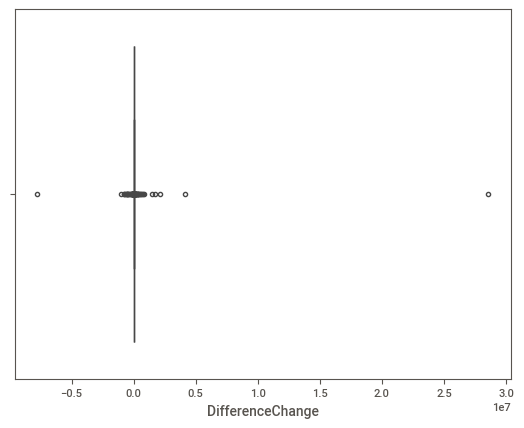

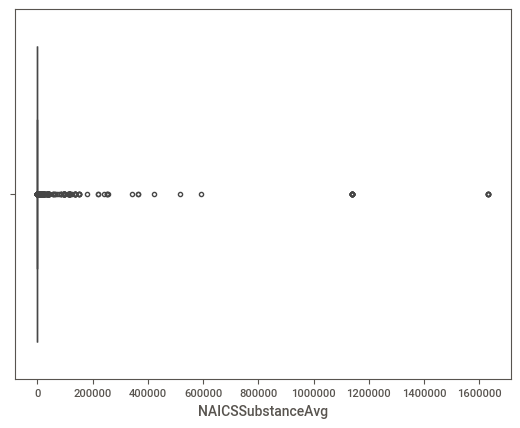

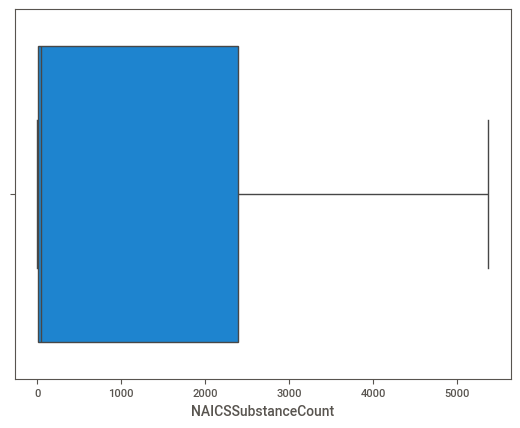

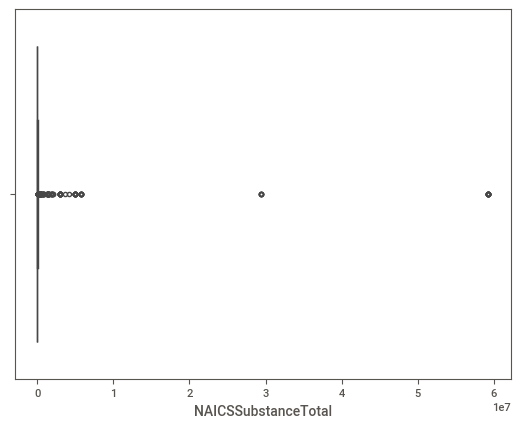

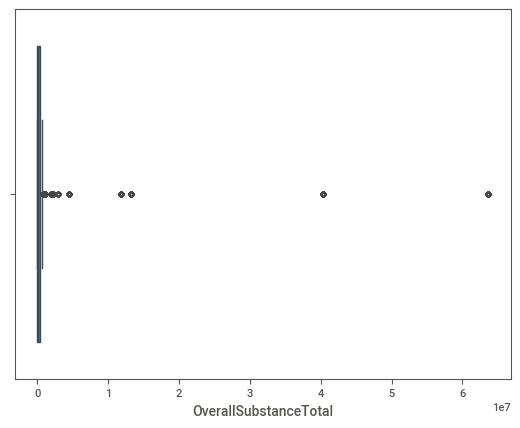

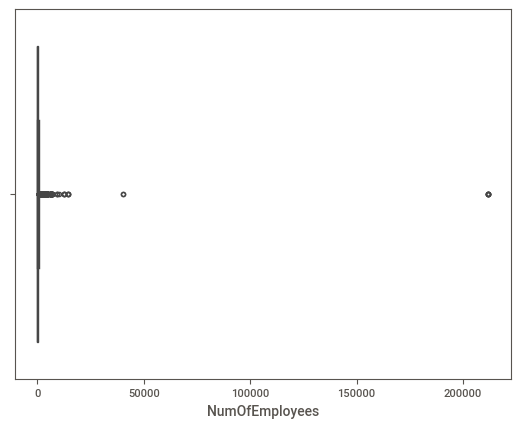

In [ ]:
#importing liberaries
import matplotlib.pyplot as plt
import seaborn as sns

# Create a boxplot for each numeric column in df_clean to check outliers in each column
for col in df_clean.select_dtypes(include=["number"]):
    sns.boxplot(x=col, data=df_clean)
    plt.show()


In [ ]:

def remove_outliers(df, col):
    # Calculate the z-score for each data point in the column
    z_scores = np.abs((df[col] - df[col].mean()) / df[col].std())

    # Define a threshold for outlier identification
    threshold = 3

    # Select data points that are not outliers
    non_outliers = df[z_scores < threshold]

    return non_outliers

# Use the remove_outliers function to remove outliers from each numeric column
for col in df_clean.select_dtypes(include=["number"]):
    df_clean = remove_outliers(df_clean, col)


<ipython-input-67-85204c5ce9bc>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_clean.corr(), annot= True, cmap='coolwarm')


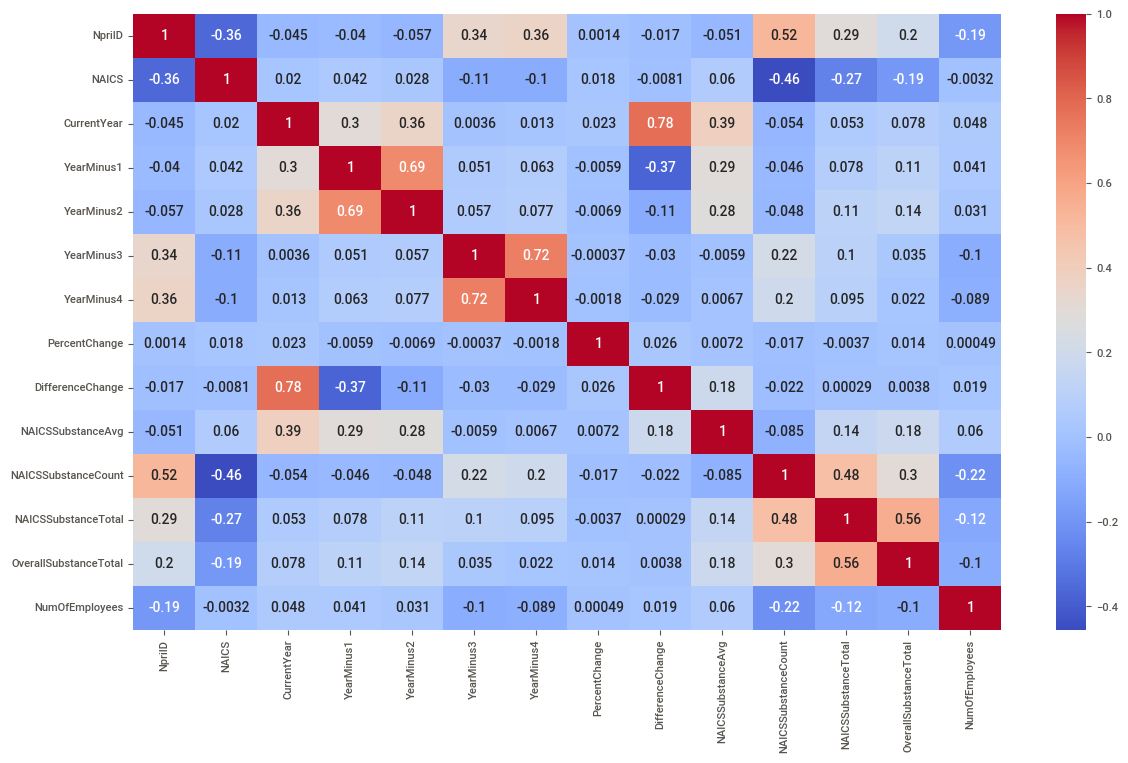

In [ ]:
#ploting a heatmap of corelation between columns
plt.figure(figsize=(14,8))
sns.heatmap(df_clean.corr(), annot= True, cmap='coolwarm')

plt.show()

In [ ]:
#use describe for statistic of dataframe
df_clean.describe()

NpriID          NAICS   CurrentYear    YearMinus1    YearMinus2  \
count  14320.000000   14320.000000  14320.000000  14320.000000  14320.000000   
mean   15472.300838  274503.106913     98.705859     68.260364     48.750749   
std    11579.763017   87968.517242    716.085642    486.069350    282.317903   
min        1.000000  111419.000000  -2196.360000      0.000000      0.000000   
25%     4305.000000  211110.000000      0.170822      0.150000      0.234000   
50%    11895.000000  212232.000000      1.765350      1.798533      1.780000   
75%    27901.250000  325189.000000     14.512130     13.119098      7.306375   
max    33819.000000  562990.000000  20090.000000  21717.410000   8090.139000   

         YearMinus3    YearMinus4  PercentChange  DifferenceChange  \
count  14320.000000  14320.000000   14320.000000      14320.000000   
mean    1046.557823    707.550166     180.159827         30.445502   
std     1572.780988    897.006657    4292.195398        736.130008   
min    -1040.460000   -878.970000      -3.847244     -19278.536100   
25%        0.380000      0.575375      -0.657264         -1.429900   
50%        8.621146     17.947450       0.493812          0.020000   
75%     3490.297573   1883.819854       1.578278          2.966107   
max     6725.252100   3723.480000  272366.130089      20070.400000   

       NAICSSubstanceAvg  NAICSSubstanceCount  NAICSSubstanceTotal  \
count       14320.000000         14320.000000         14320.000000   
mean          109.855992          1034.656285         18402.081265   
std           704.565479          1598.095667         42300.559696   
min             0.000000             1.000000             0.000000   
25%             1.551521             9.000000            39.769506   
50%             6.626106            40.000000           807.405055   
75%            30.627910          2393.000000          5664.352636   
max         31537.901200          5372.000000        189811.800855   

       OverallSubstanceTotal  NumOfEmployees  
count           1.432000e+04    14320.000000  
mean            1.828882e+05      329.196648  
std             2.865481e+05      941.272366  
min             1.000000e-04        0.000000  
25%             2.988748e+03        2.000000  
50%             6.900458e+04       25.000000  
75%             2.970920e+05      252.000000  
max             4.403999e+06    12270.000000

In [ ]:
#installing liberary
!pip install sweetviz

In [ ]:
import sweetviz as sv
report = sv.analyze(df_clean)
report.show_html('sweetviz_report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



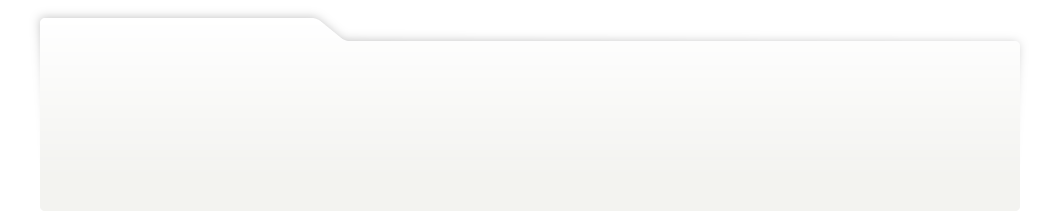
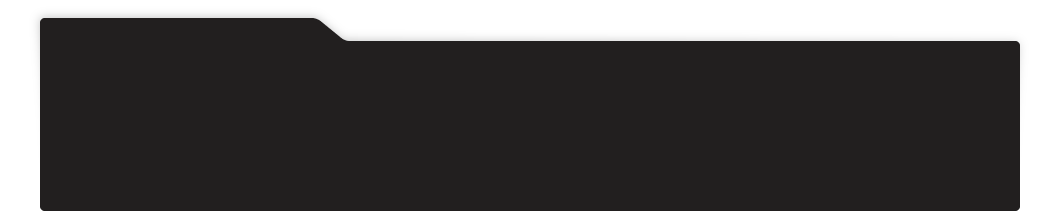
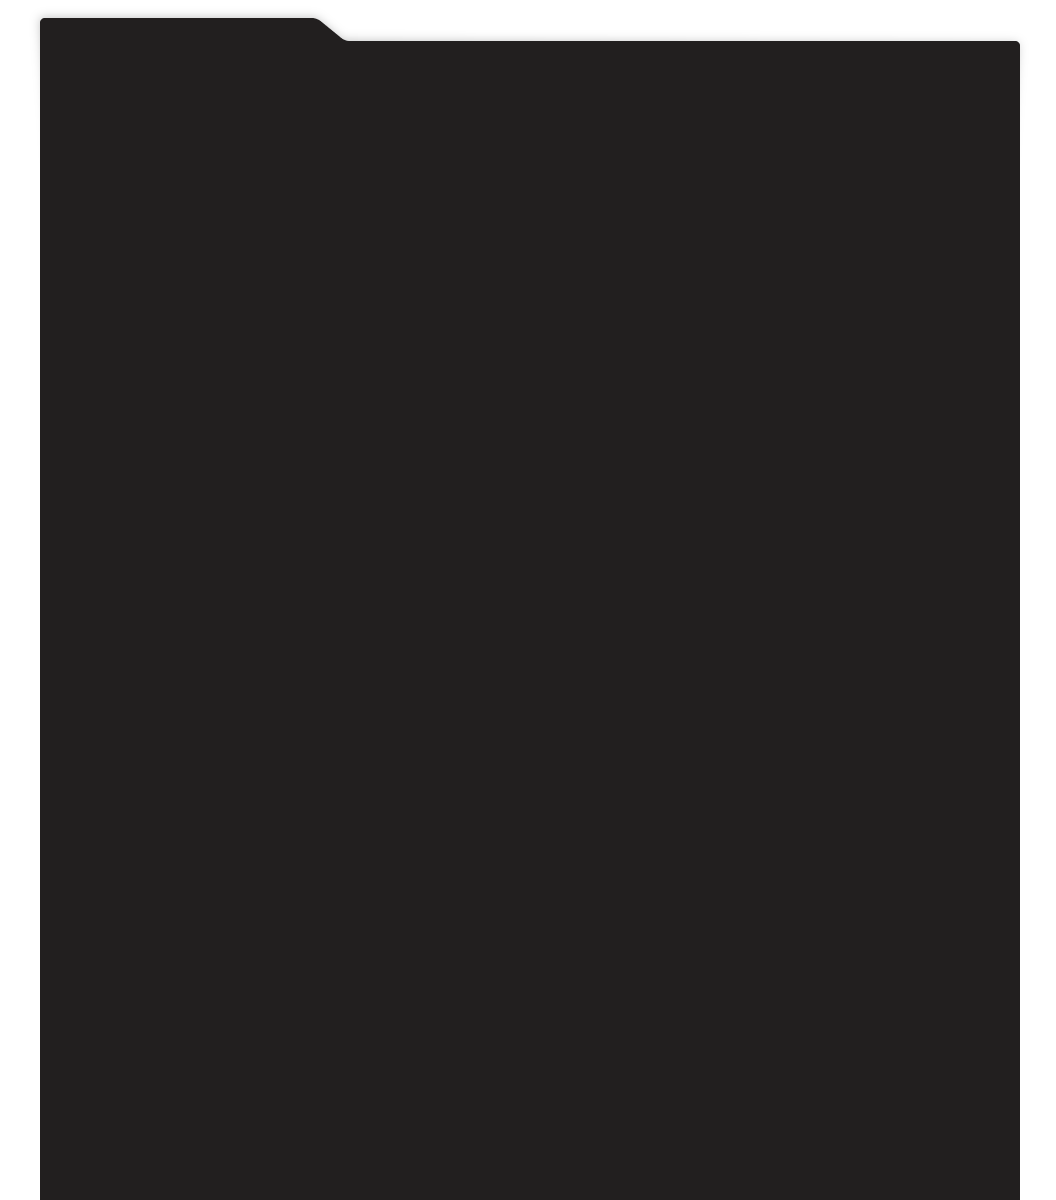
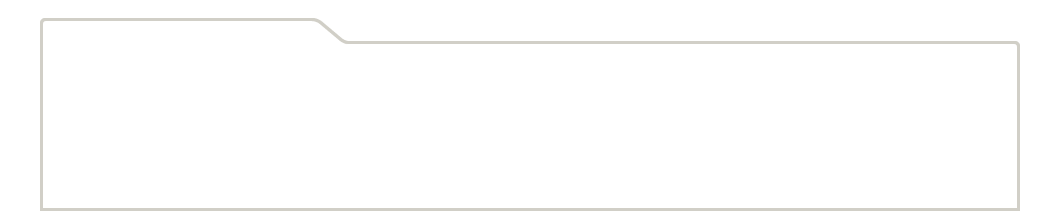
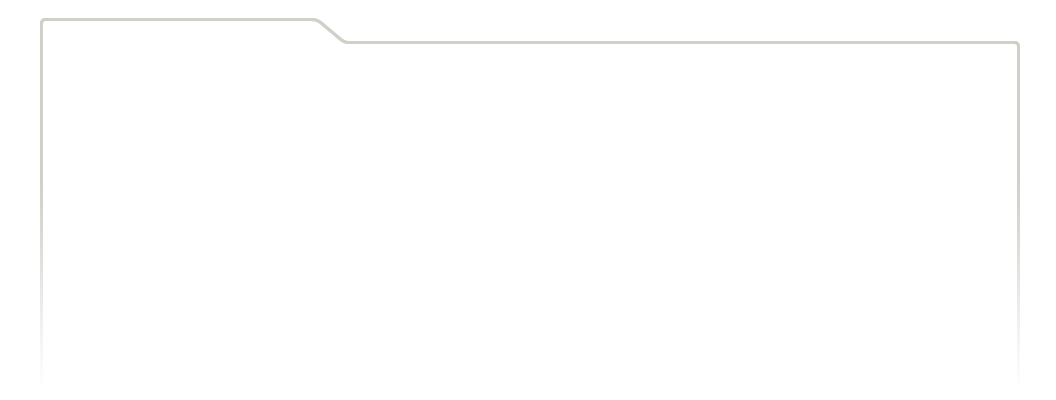
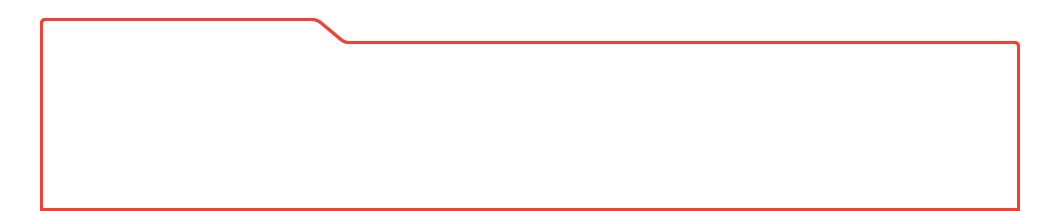
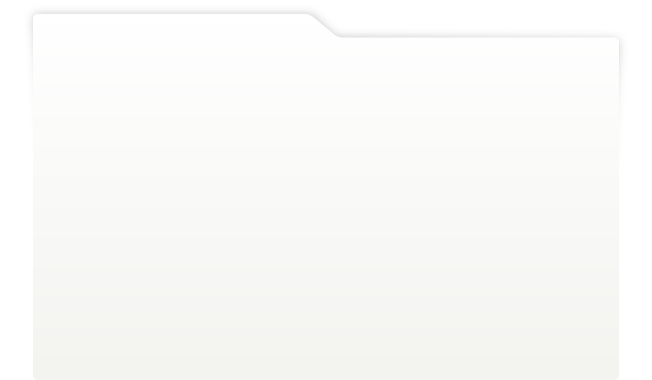
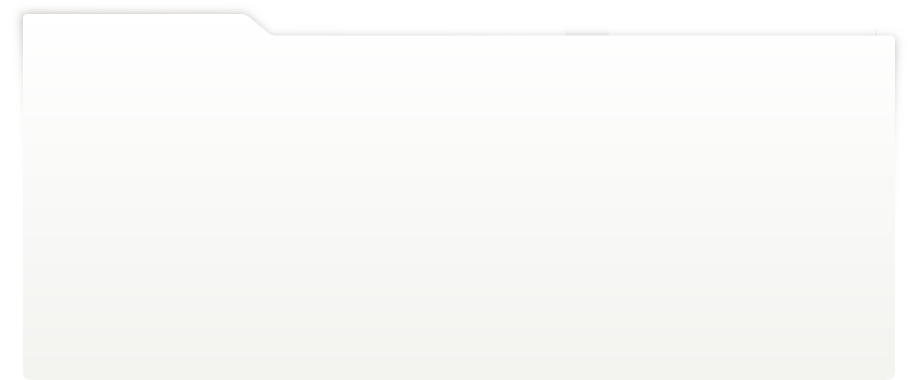
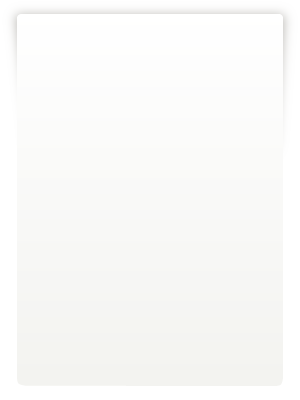
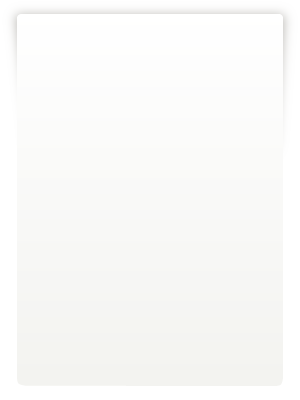
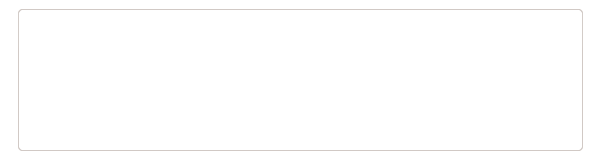
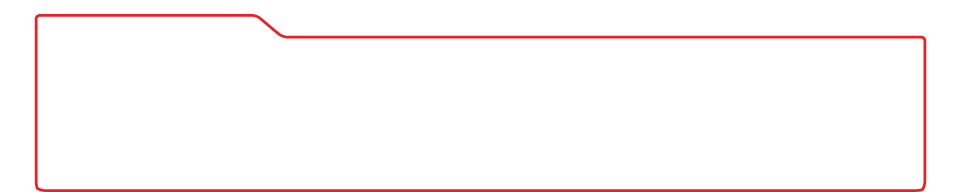
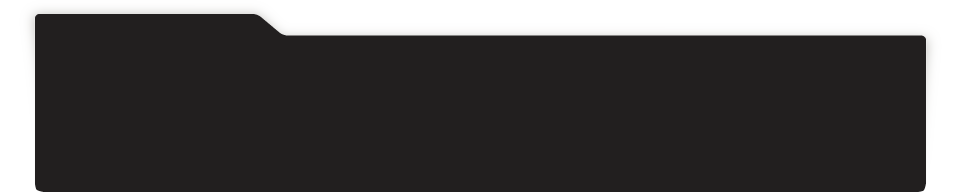
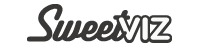
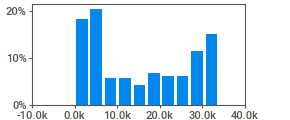
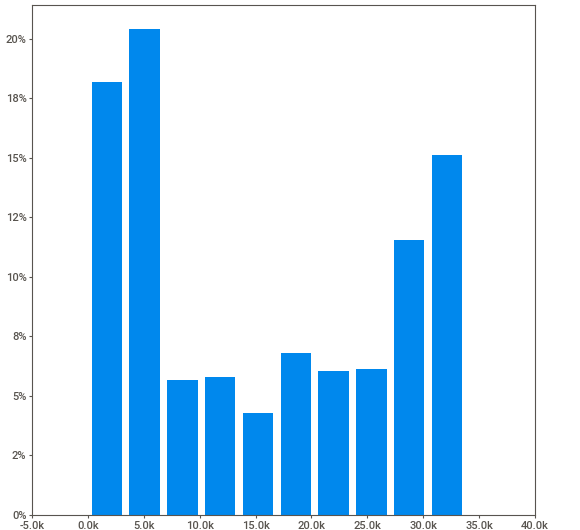
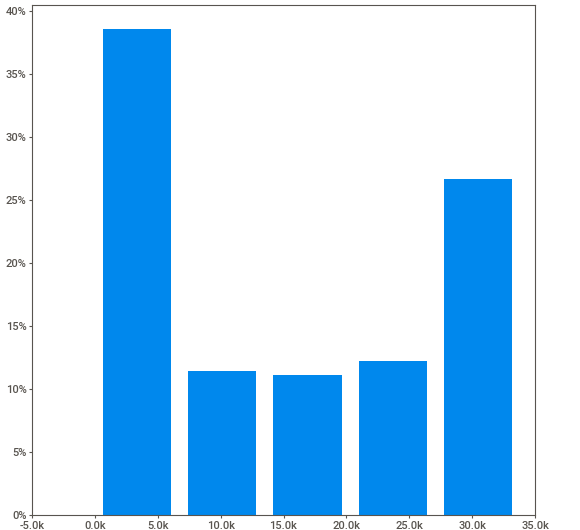
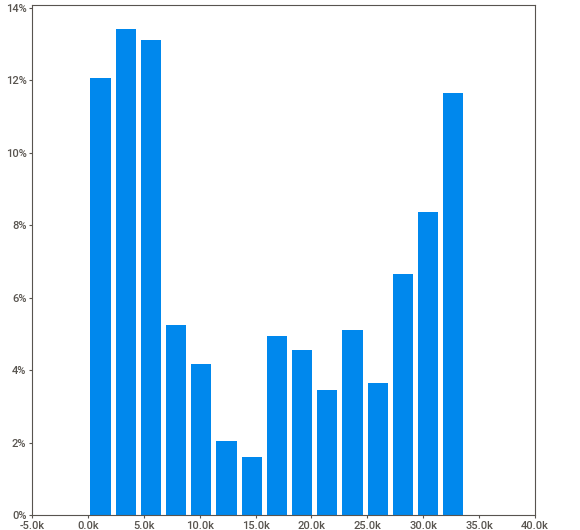
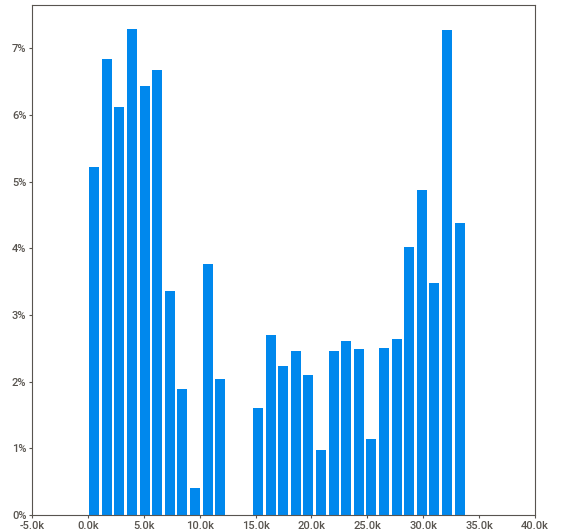
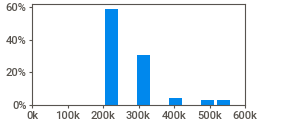
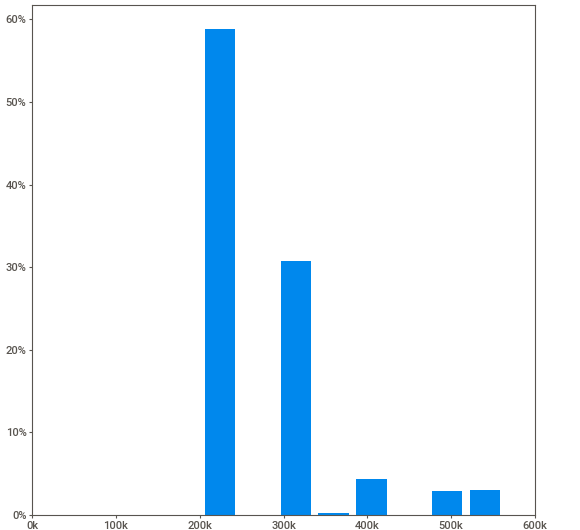
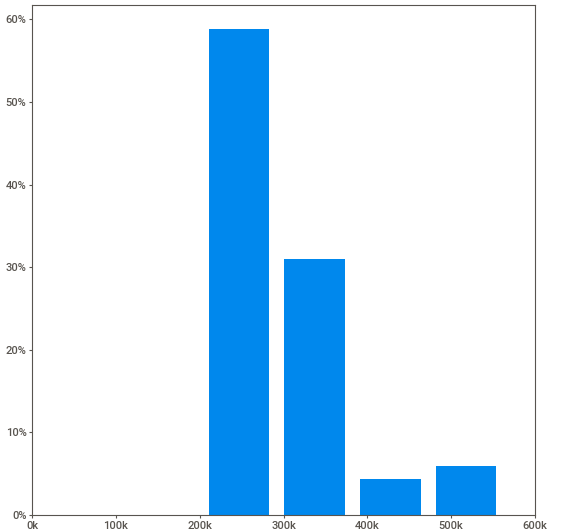
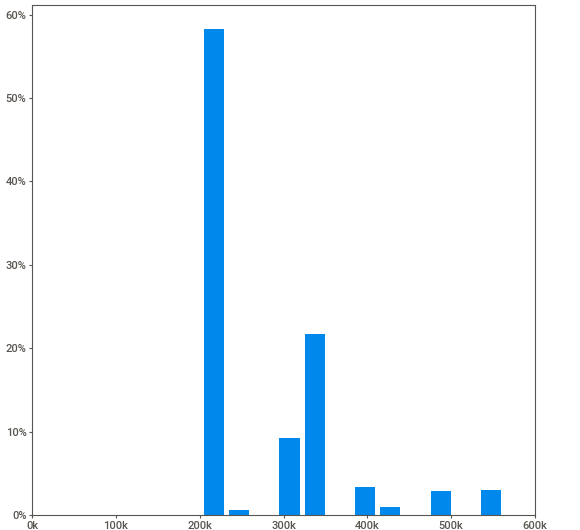
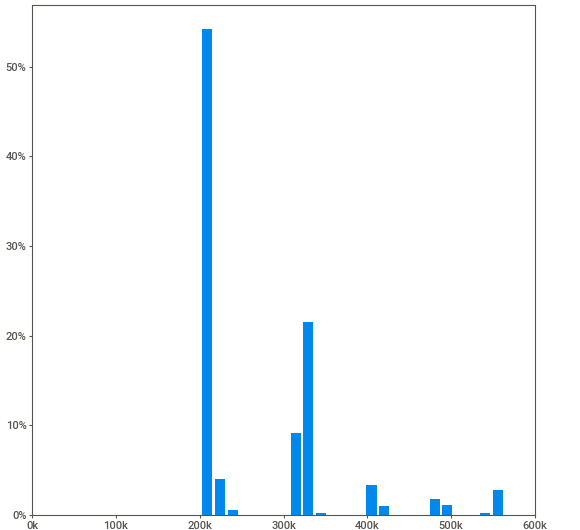
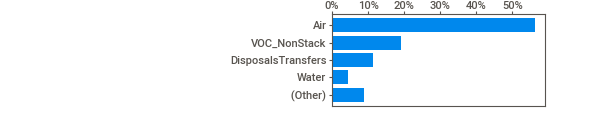
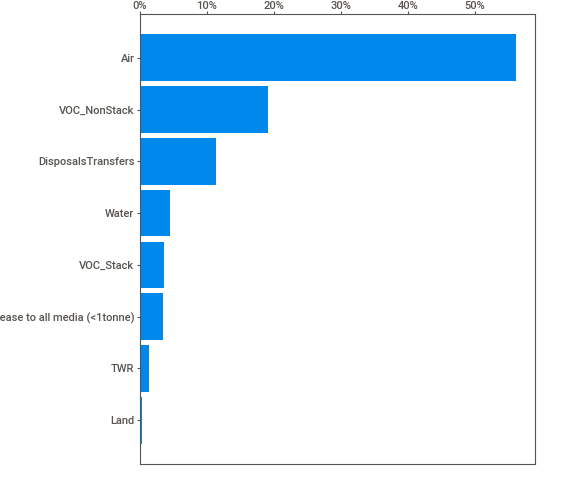
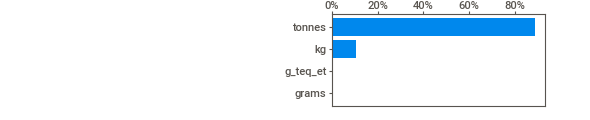
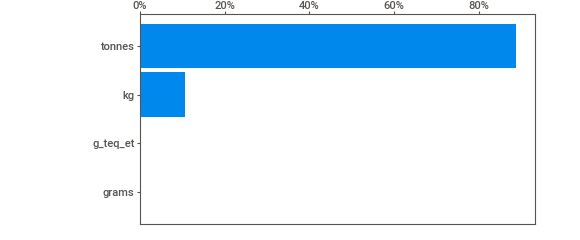
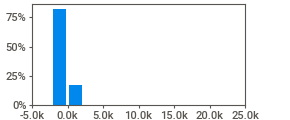
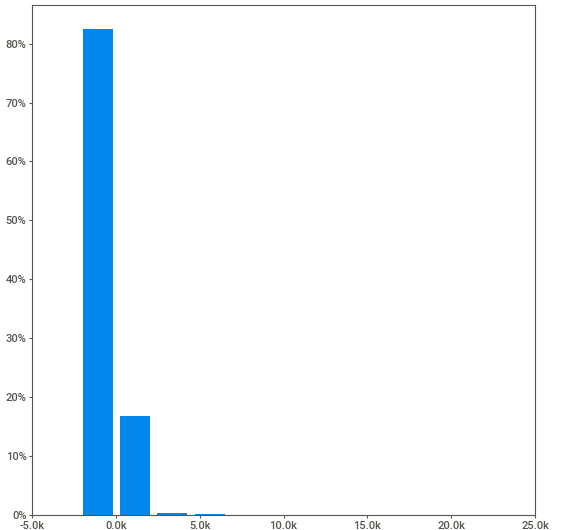
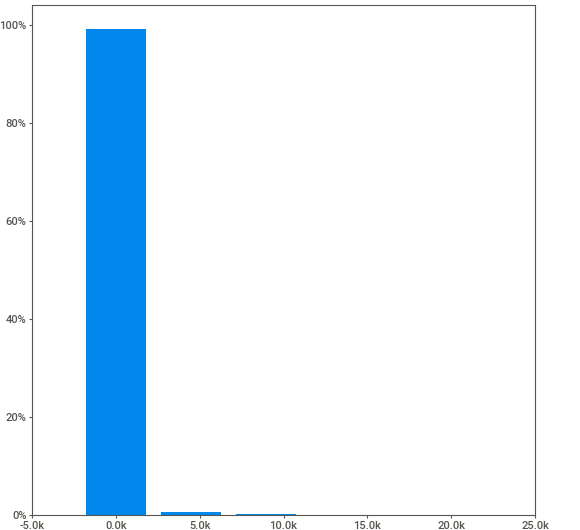
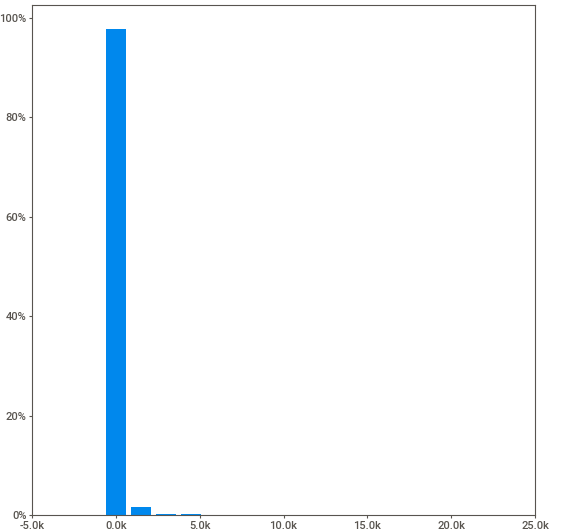
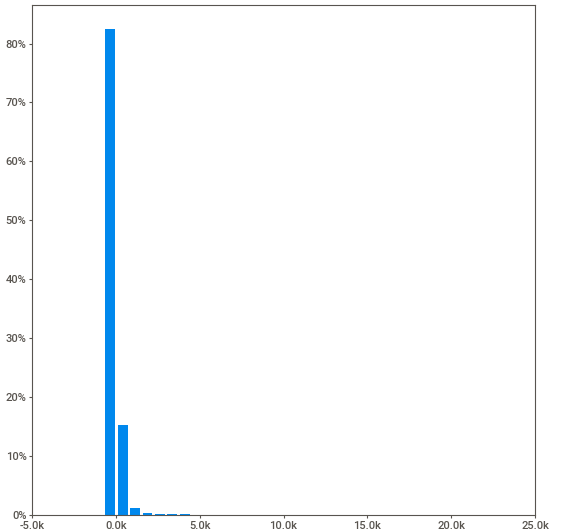
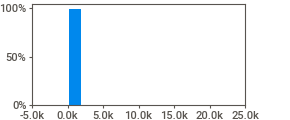
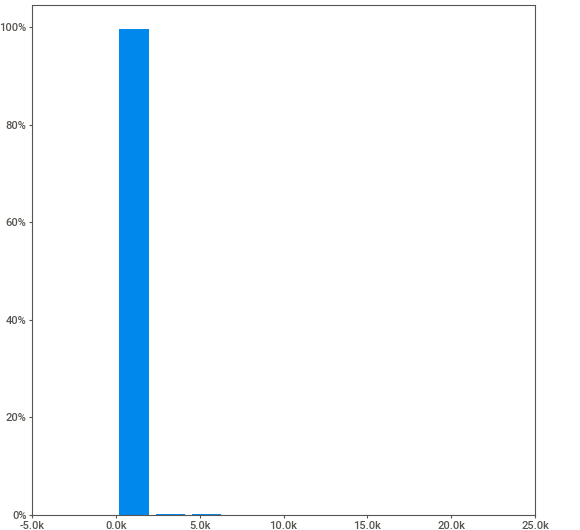
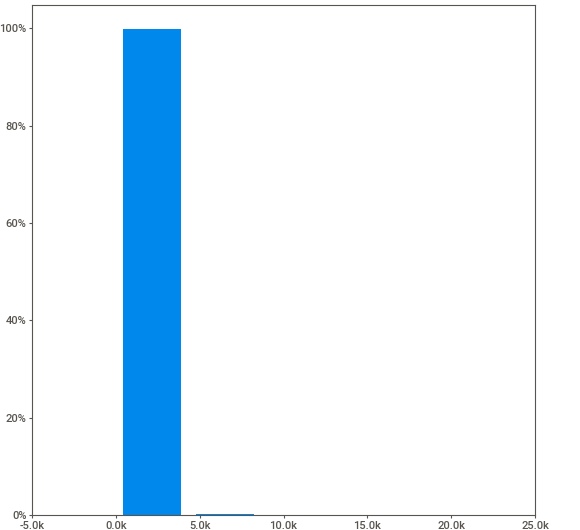
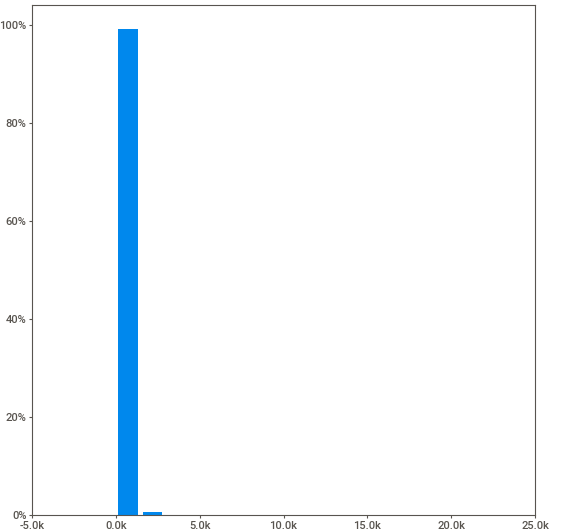
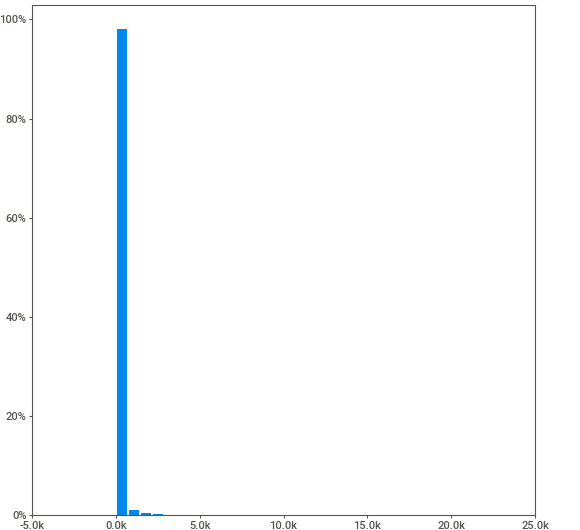
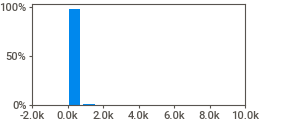
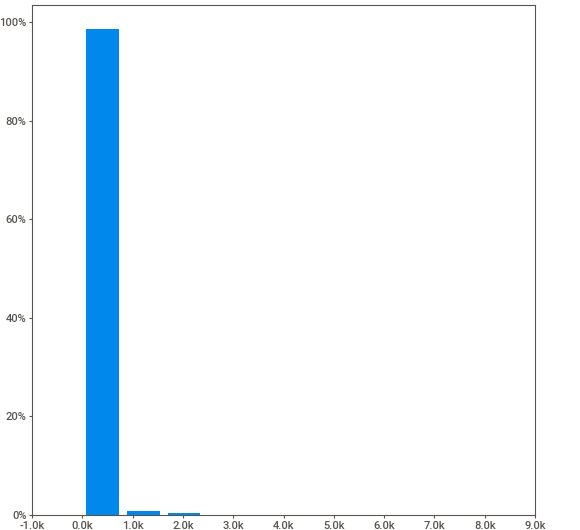
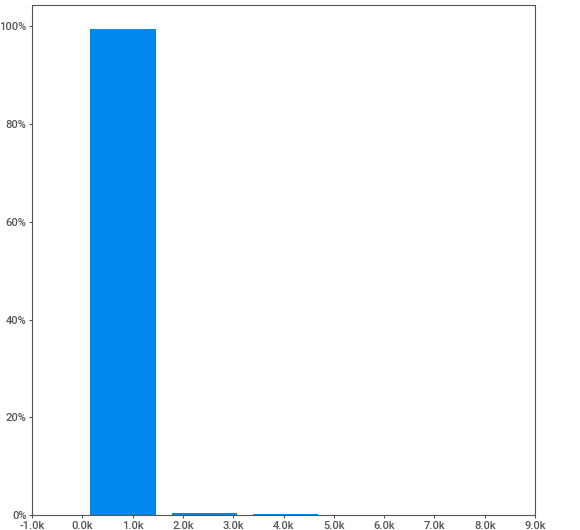
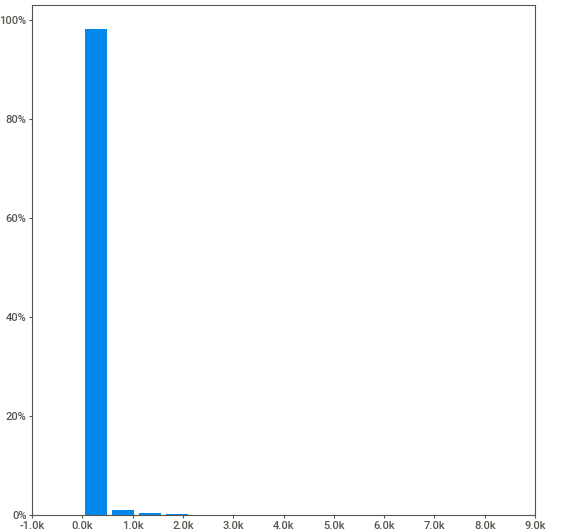
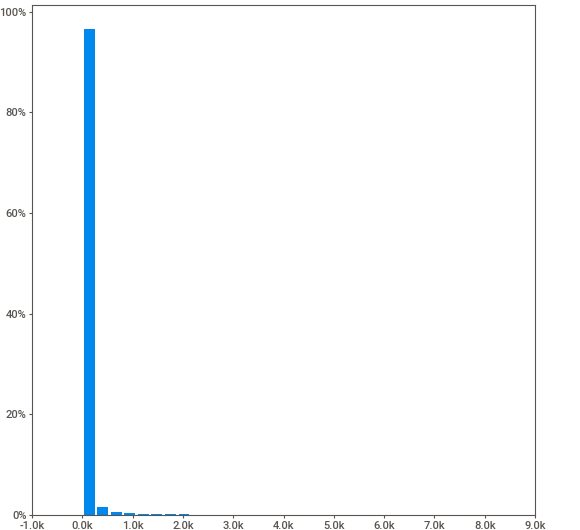
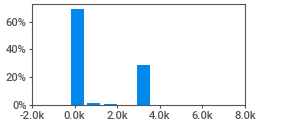
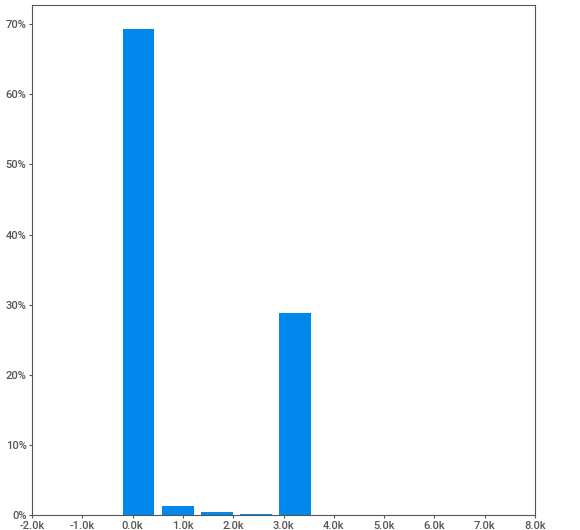
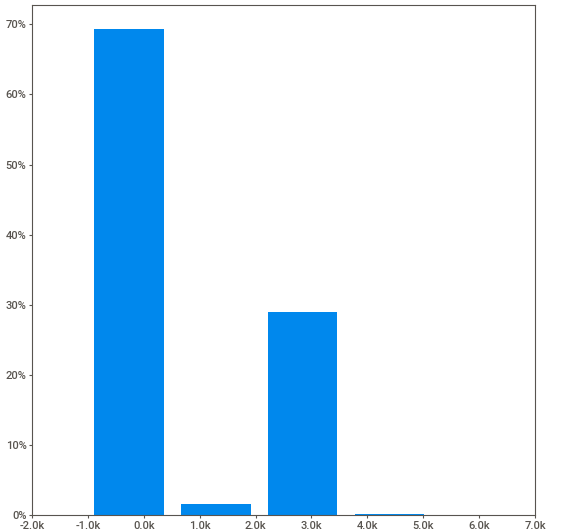
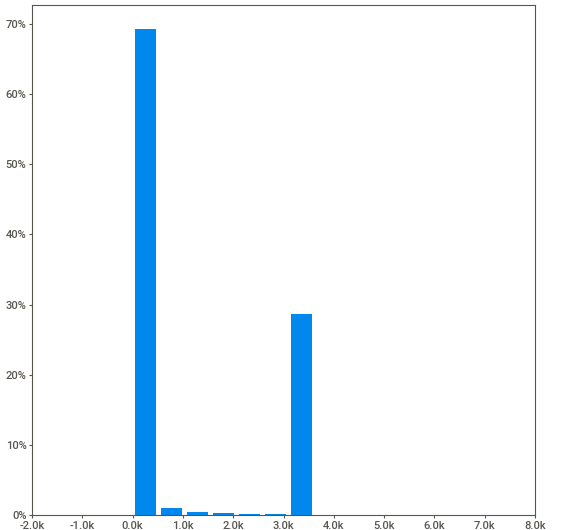
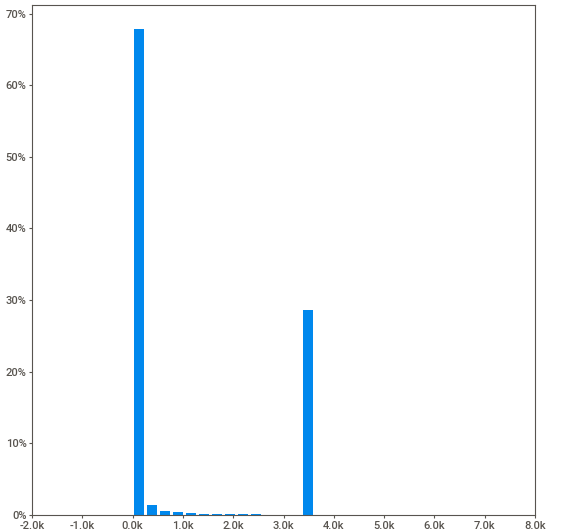
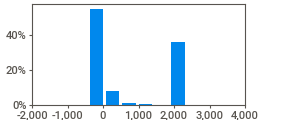
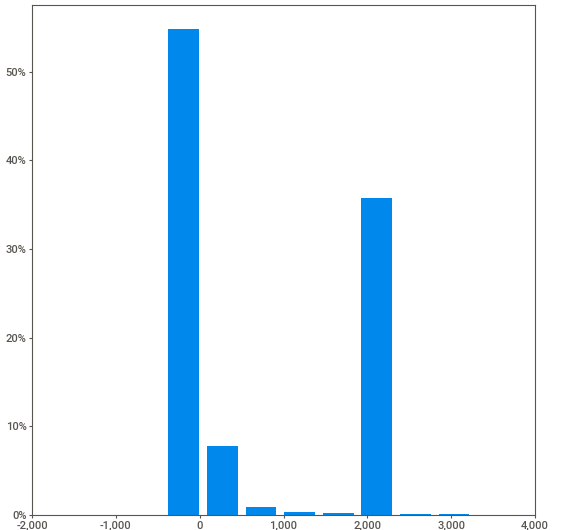
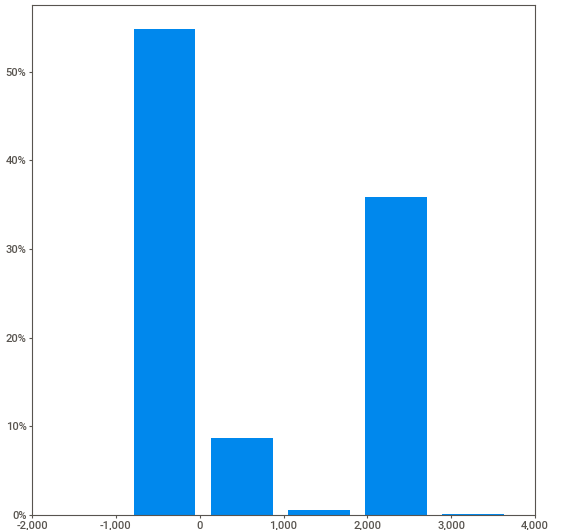
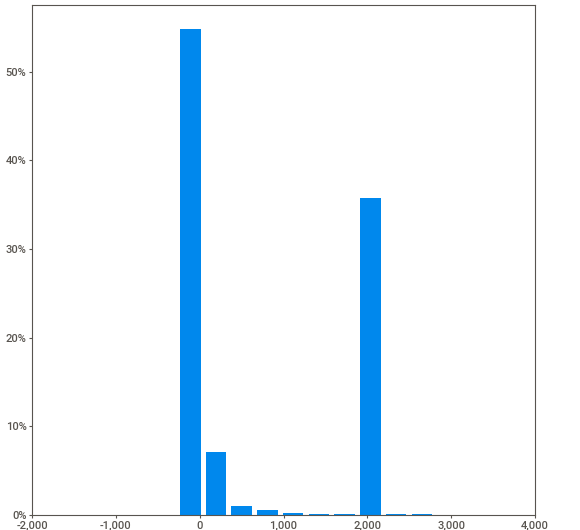
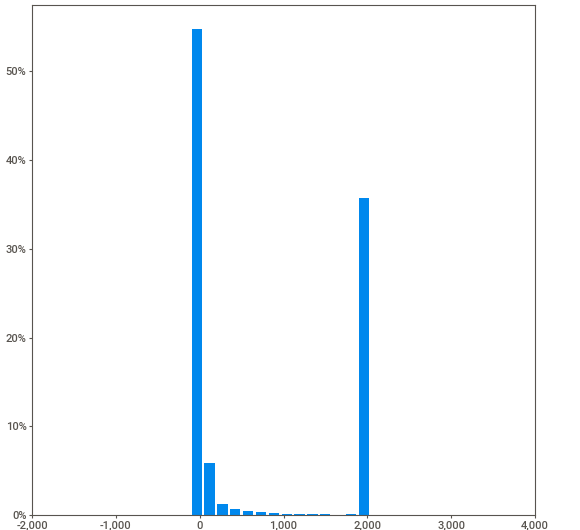
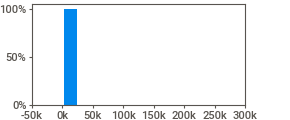
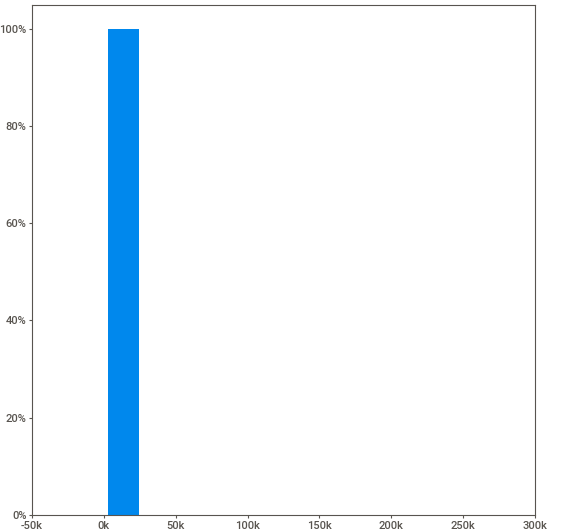
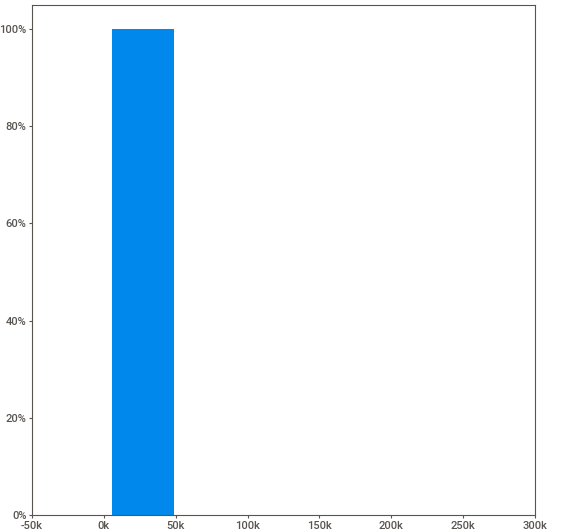
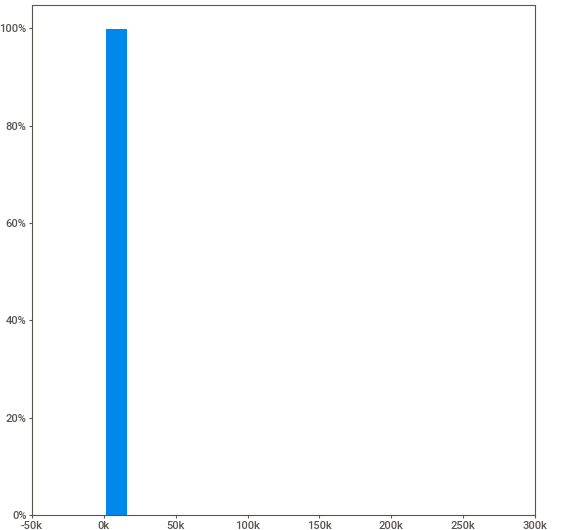
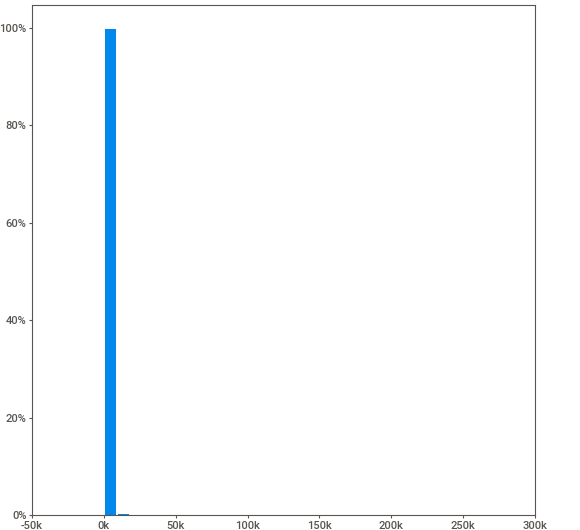
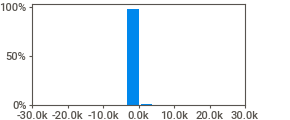
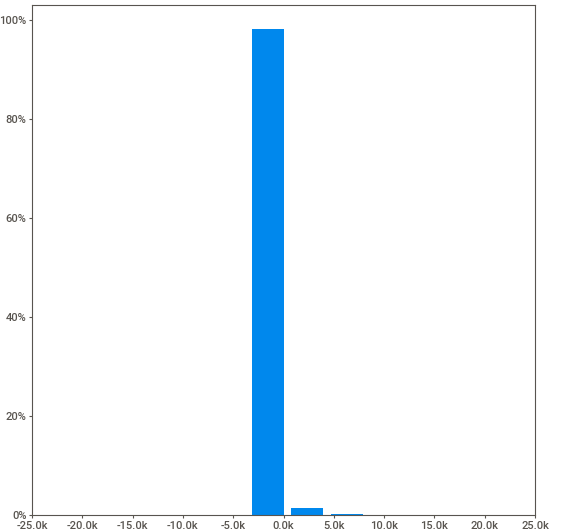
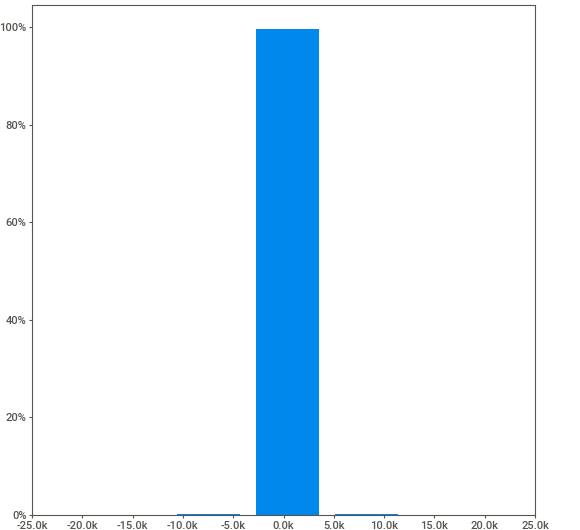
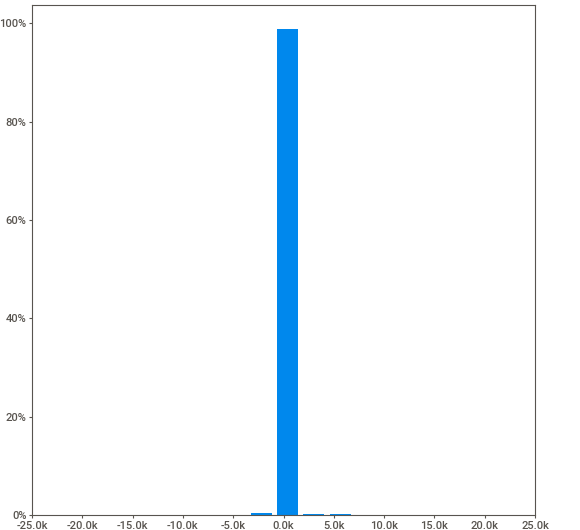
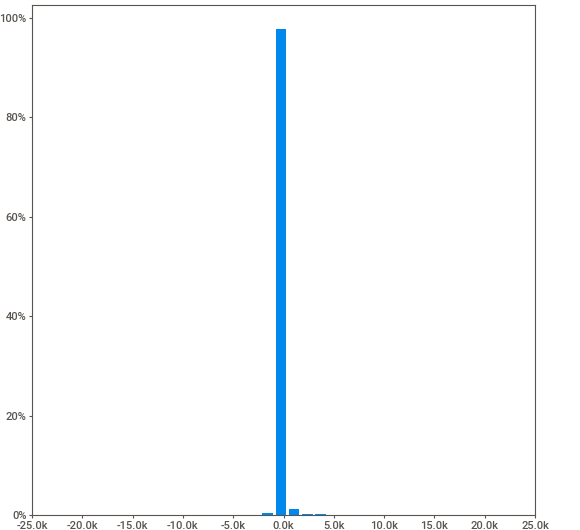
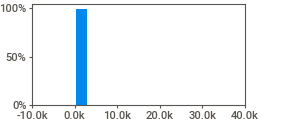
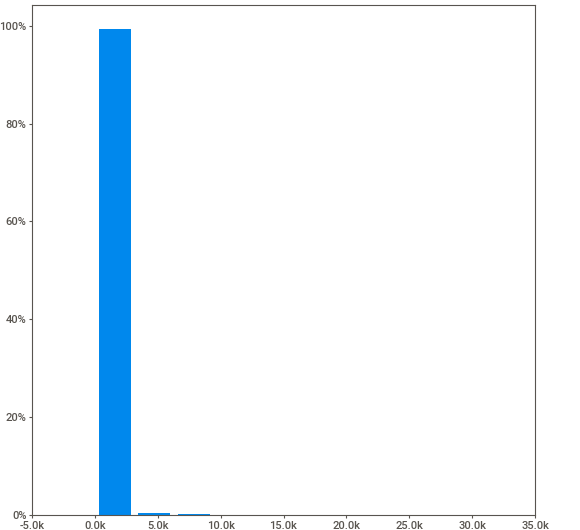
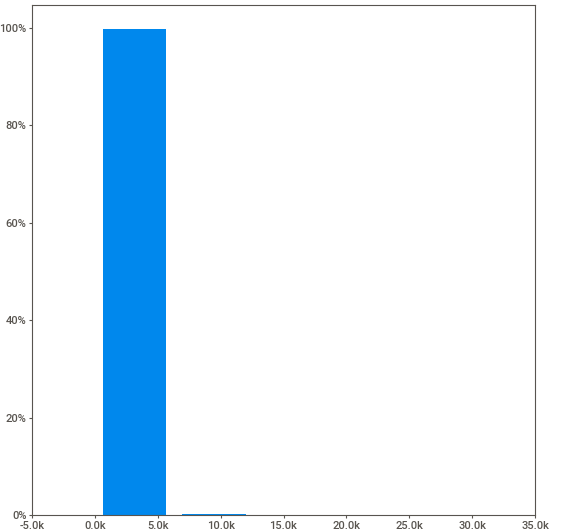
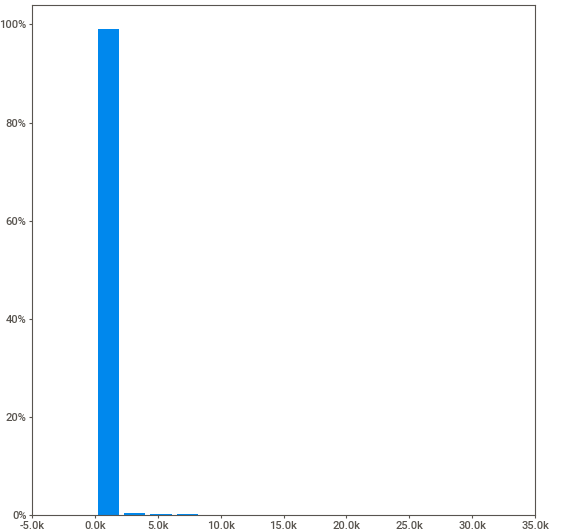
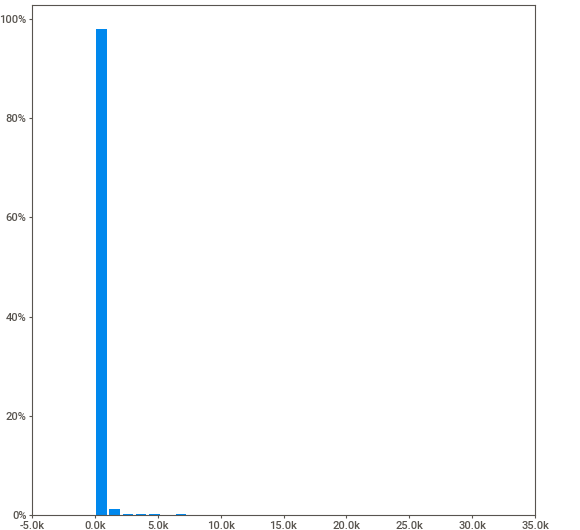
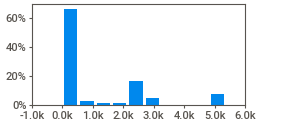
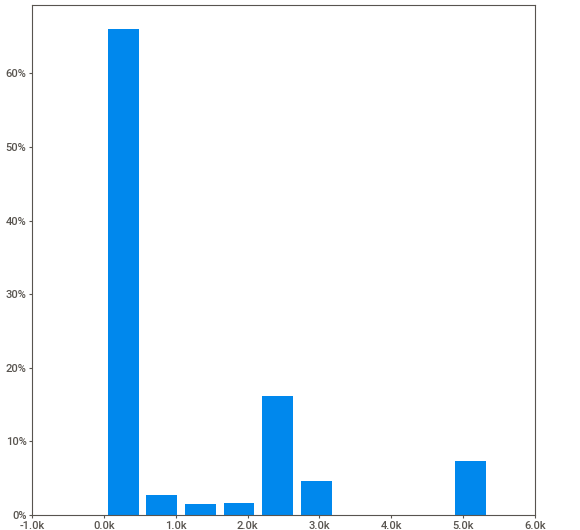
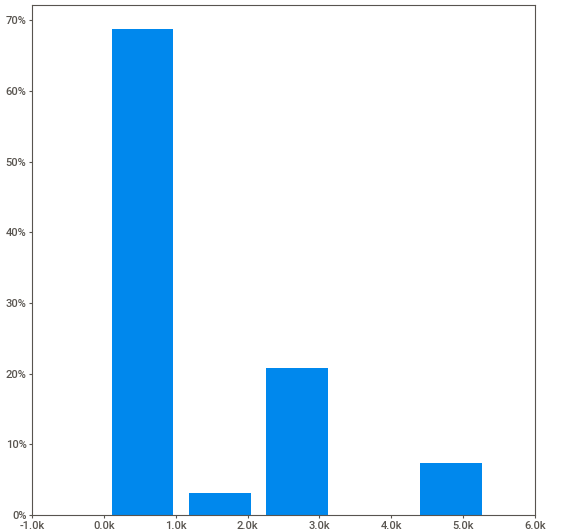
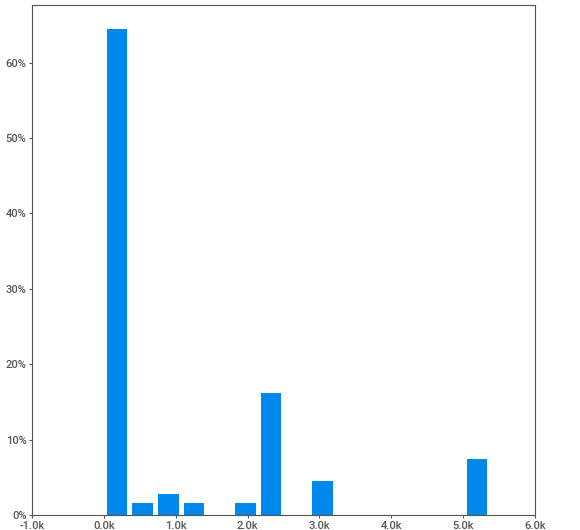
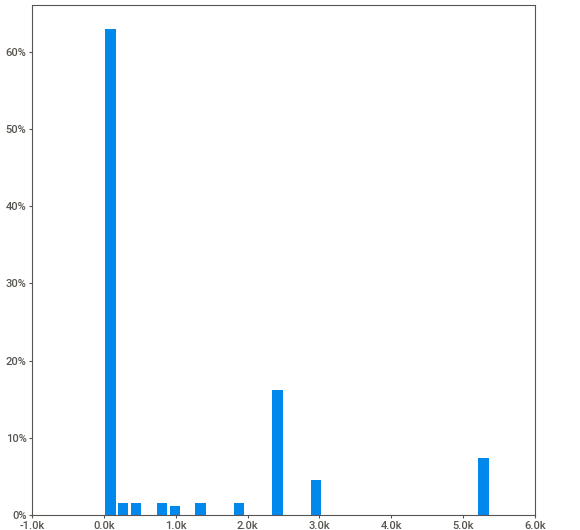
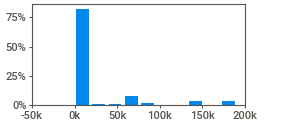
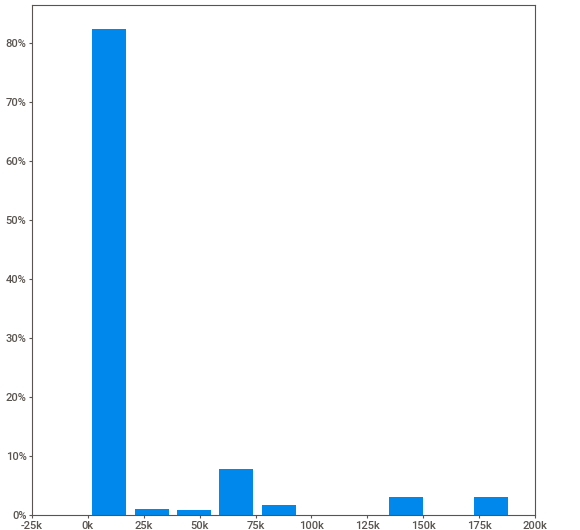
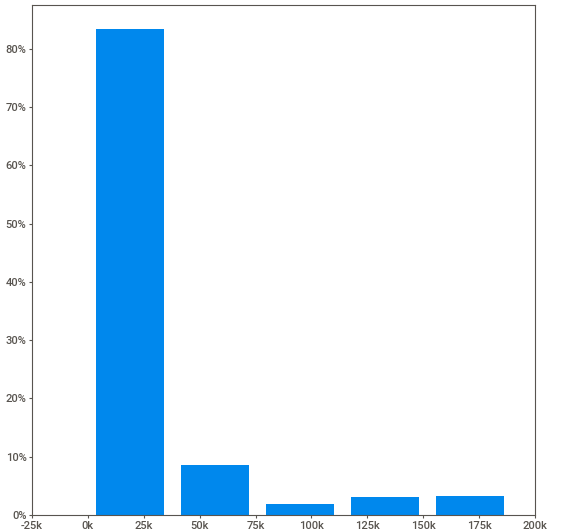
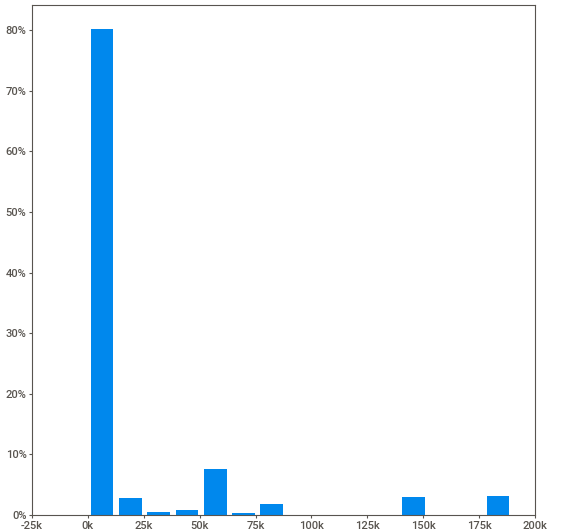
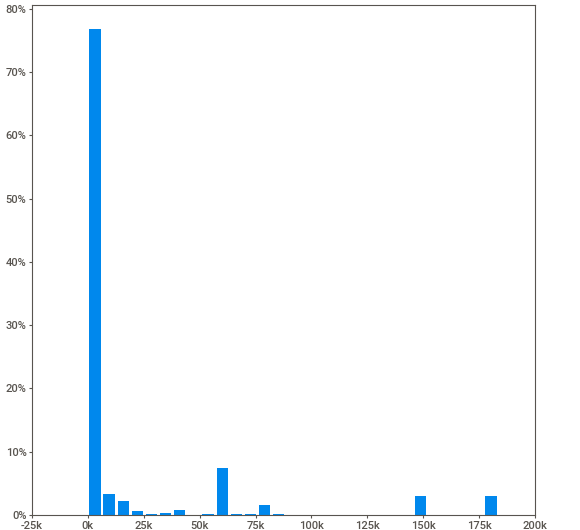
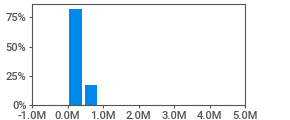
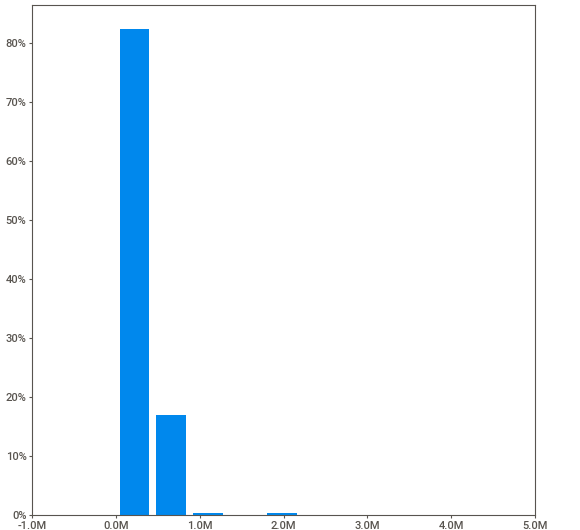
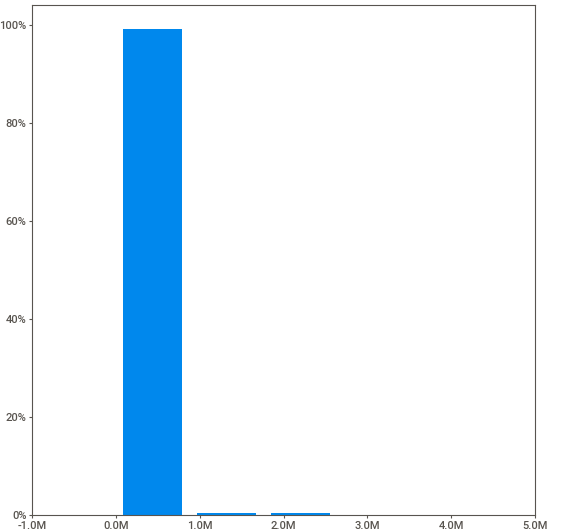
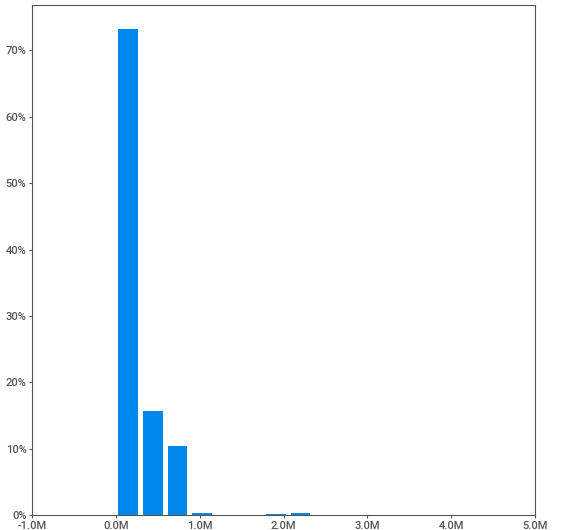
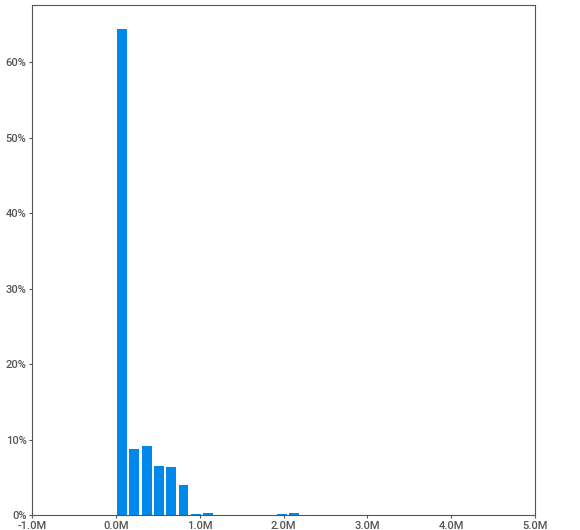
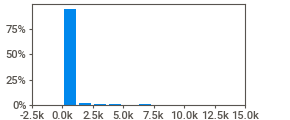
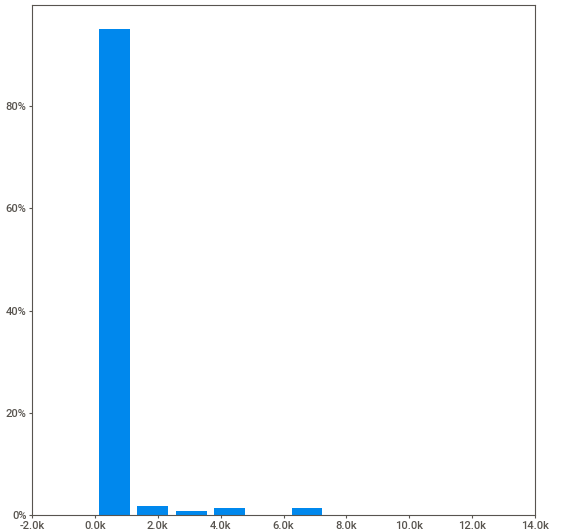
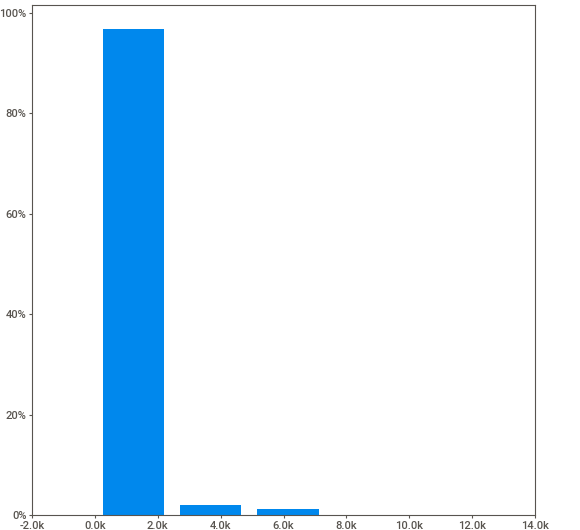
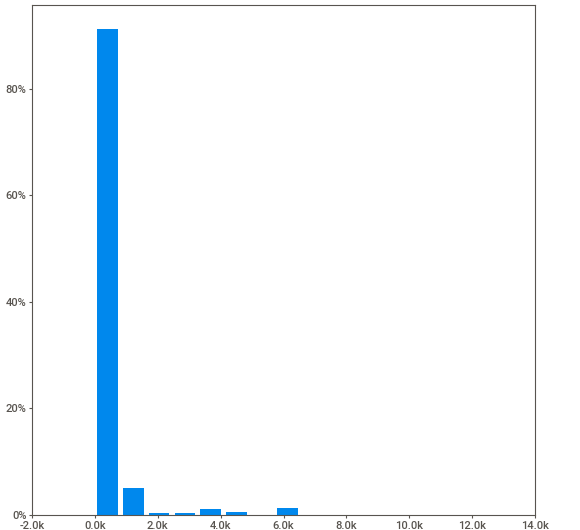
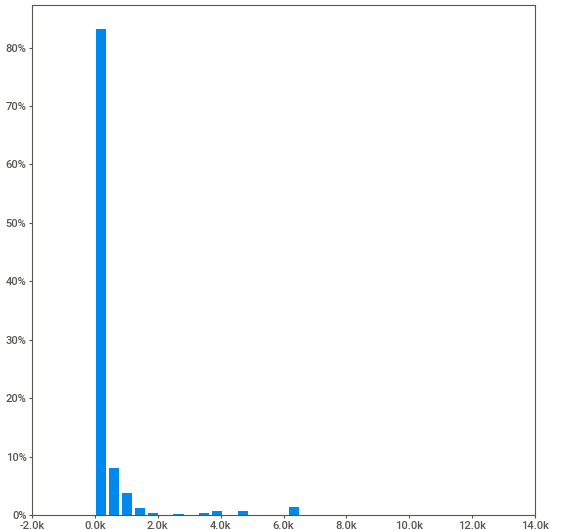
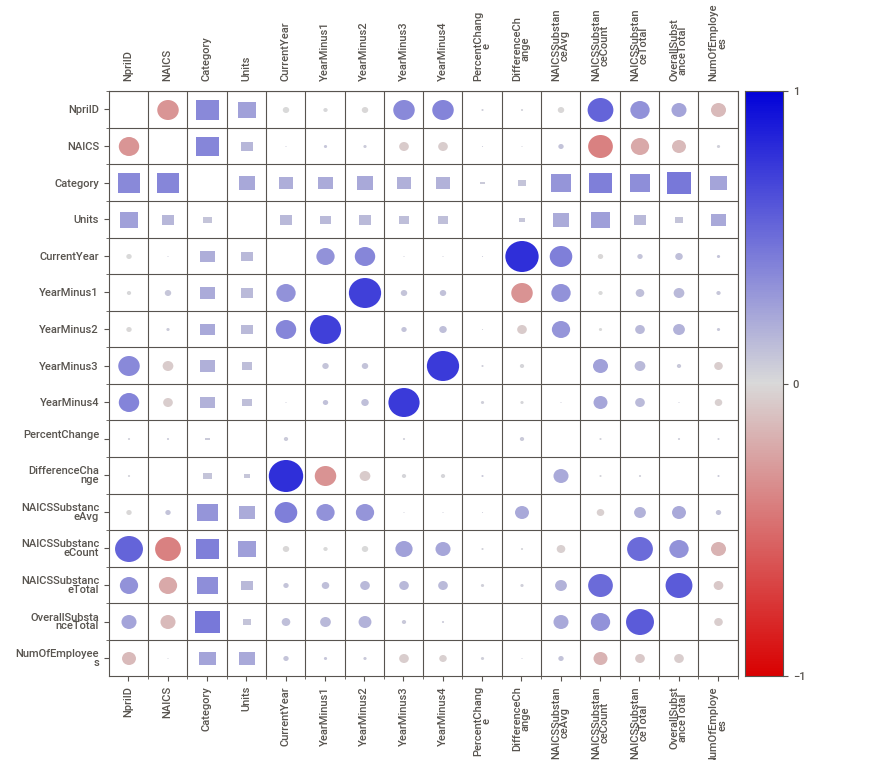
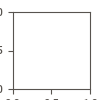

In [ ]:
#  show the graphs generated by sweetviz_report.html of Auto EDA  of dataframe

from IPython.display import HTML

# Load the Sweetviz report into an HTML object
html_report = open('sweetviz_report.html').read()

# Display the report in the notebook
HTML(html_report)


In [ ]:
#coverting cleaned dataset into csv to download
df_clean.to_csv('cleaned_2022.csv', index=False)


Cleaning of NPRI Data for QC.xlsx - NPRI Data for review.csv File


In [ ]:
# read csv file
df_review = pd.read_csv('NPRI Data for QC.xlsx - NPRI Data for review.csv')

<ipython-input-73-24742968a136>:2: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df_review = pd.read_csv('NPRI Data for QC.xlsx - NPRI Data for review.csv')


In [ ]:
# making copy of dataframe to do EDA
df_copy = df_review.copy()
# removing duplicate values if we have any
df_copy.duplicated().count()
df_copy.drop_duplicates(inplace=True)


In [ ]:
# checking the data type of our dataframe
df_copy.dtypes

NpriID                                                       int64
Company name                                                object
FacilityName                                                object
NPRI_Report_ReportYear                                       int64
Quantity                                                   float64
Cas                                                         object
Detail_NPRI_SubstanceInfo_NameEn                            object
Group                                                       object
Category                                                    object
Latitude                                                   float64
Longitude                                                  float64
ProvinceEn                                                  object
Detail_UnitType_NameEn                                      object
NAICSPrimary                                                 int64
NAICSTitleEn                                                ob

In [ ]:
# checking the shape of dataframe
df_copy.shape

(134997, 18)

In [ ]:
#dropping columns that we do not need
columns_drop = ['Company name','Substance comments by category for 2022','Substance comments for disposals and all media for 2022']
df_copy.drop(columns=columns_drop, inplace=True)


In [ ]:
pd.options.mode.copy_on_write = False
'Detail_UnitType_NameEn' in df_copy.columns

c1 = 1000
c2 = 0.001
c3 = 1

df_copy['Quantity'] = np.where(df_copy['Detail_UnitType_NameEn'] == 'tonnes',
                               df_copy['Quantity']*c1,
                               np.where(df_copy['Detail_NPRI_SubstanceInfo_NameEn'] == 'kg',
                                        df_copy['Quantity']*c3,
                                        np.where(df_copy['Detail_UnitType_NameEn'] == 'g',
                                                 df_copy['Quantity']*c2,
                                                 df_copy['Quantity'])))

In [ ]:
df_copy['Detail_UnitType_NameEn'].unique()

array(['tonnes', 'kg', 'g TEQ', 'grams', nan], dtype=object)

In [ ]:
# checking missing values
df_copy.isnull().sum()

NpriID                                0
FacilityName                          0
NPRI_Report_ReportYear                0
Quantity                            171
Cas                                   1
Detail_NPRI_SubstanceInfo_NameEn      1
Group                                 1
Category                              1
Latitude                              1
Longitude                             1
ProvinceEn                            1
Detail_UnitType_NameEn                1
NAICSPrimary                          1
NAICSTitleEn                          1
Number of employees                   1
dtype: int64

In [ ]:
# using median to fill misiing values
df_copy.fillna(method = 'ffill',inplace  = True)

In [ ]:
# using mean to fill missing values
df_copy.fillna(method = 'bfill',inplace  = True)

In [ ]:
# dropping rows in facilityname column which have missing values
df_copy = df_copy.dropna(subset=['FacilityName'])

In [ ]:
# checking if we have any missing value
df_copy.isnull().sum()

NpriID                              0
FacilityName                        0
NPRI_Report_ReportYear              0
Quantity                            0
Cas                                 0
Detail_NPRI_SubstanceInfo_NameEn    0
Group                               0
Category                            0
Latitude                            0
Longitude                           0
ProvinceEn                          0
Detail_UnitType_NameEn              0
NAICSPrimary                        0
NAICSTitleEn                        0
Number of employees                 0
dtype: int64

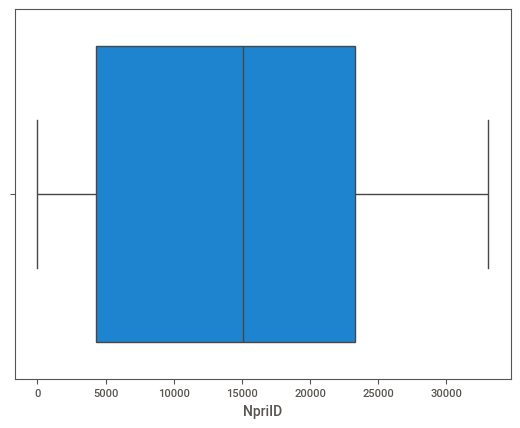

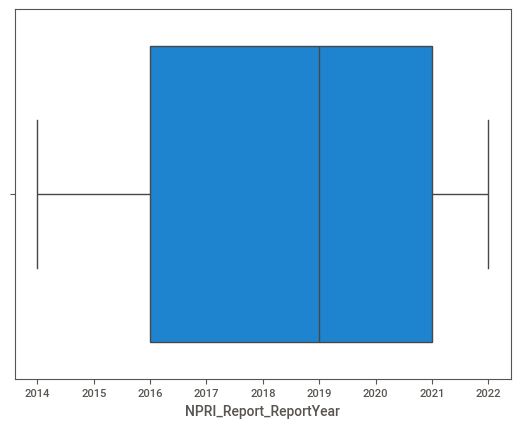

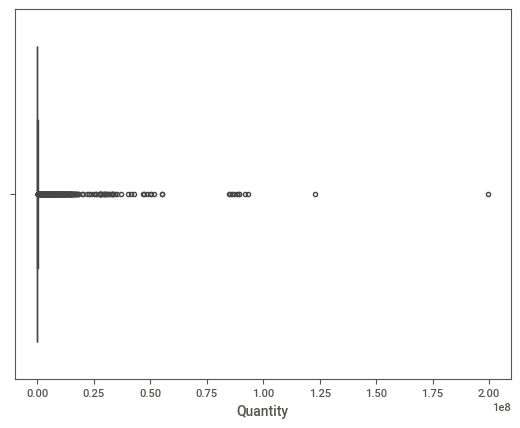

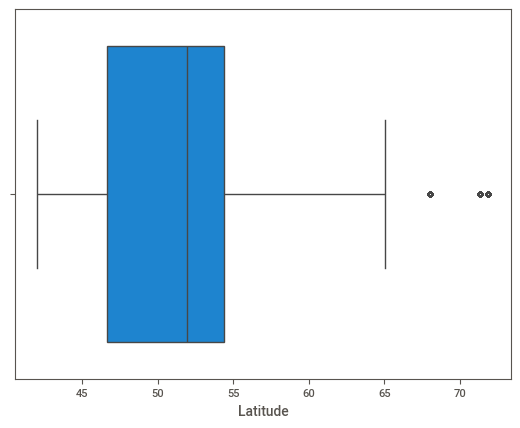

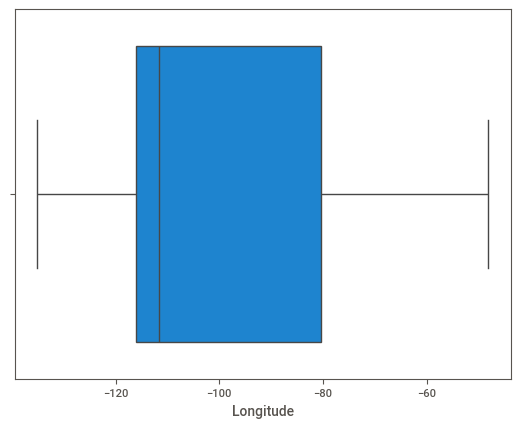

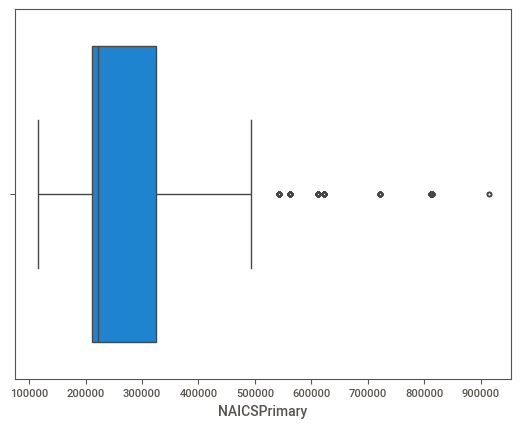

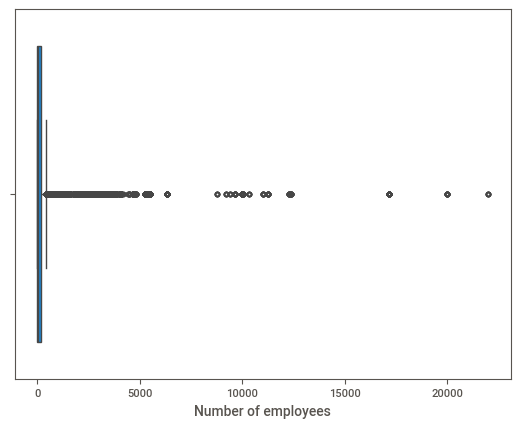

In [ ]:
#importing liberaries
import matplotlib.pyplot as plt
import seaborn as sns

#Create a boxplot for each numeric column in df_clean to check outliers
for col in df_copy.select_dtypes(include=["number"]):
    sns.boxplot(x=col, data=df_copy)
    plt.show()


In [ ]:

# Define a function to remove outliers
def remove_outliers(df, col):
    # Calculate the z-score for each data point in the column
    z_scores = np.abs((df[col] - df[col].mean()) / df[col].std())

    # Define a threshold for outlier identification
    threshold = 3

    # Select data points that are not outliers
    non_outliers = df[z_scores < threshold]

    return non_outliers

# Use the remove_outliers function to remove outliers from each numeric column
for col in df_copy.select_dtypes(include=["number"]):
    df_copy = remove_outliers(df_copy, col)


<ipython-input-41-15e70e28eda5>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_copy.corr(), annot= True, cmap='coolwarm')


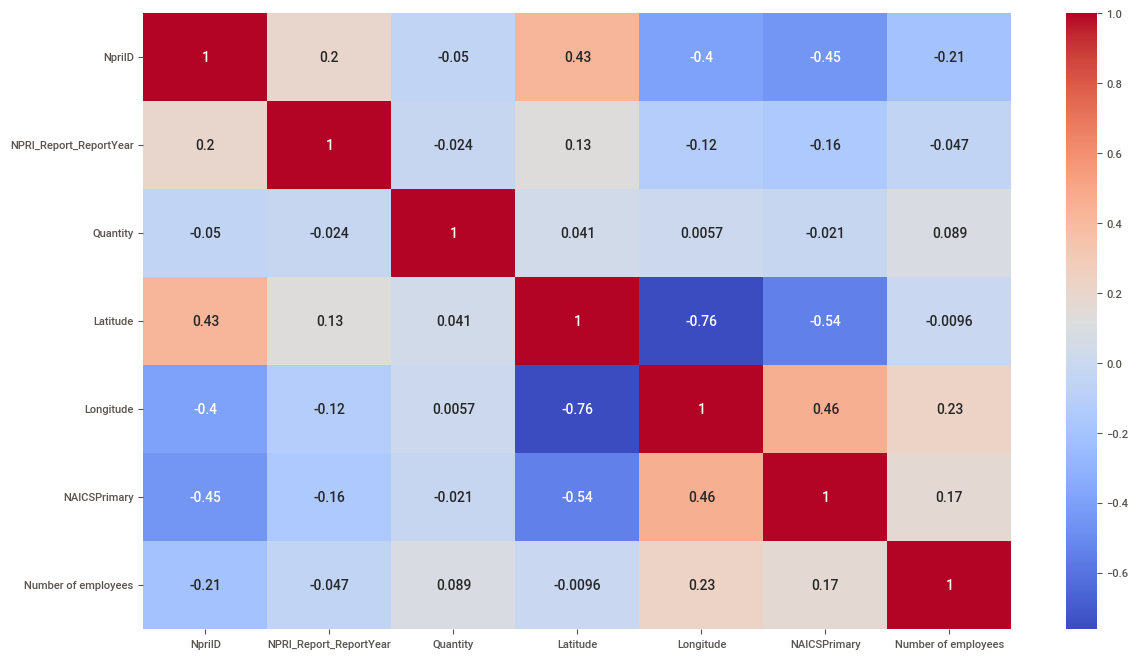

In [ ]:
# importing liberaries
import seaborn as sns
import matplotlib.pyplot as plt
# plotting heatmap of corelation between columns
plt.figure(figsize=(14,8))
sns.heatmap(df_copy.corr(), annot= True, cmap='coolwarm')

plt.show()

In [ ]:
import sweetviz as sv
report = sv.analyze(df_copy)
report.show_html('sweetviz_report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



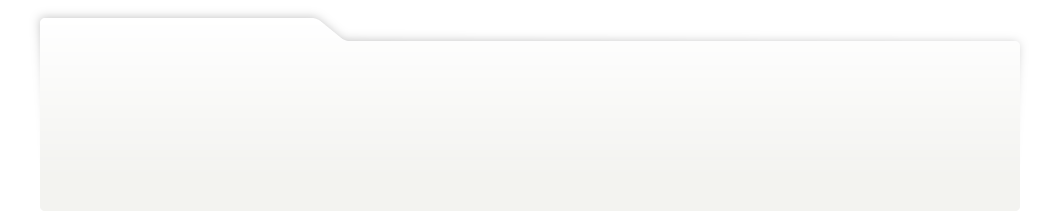
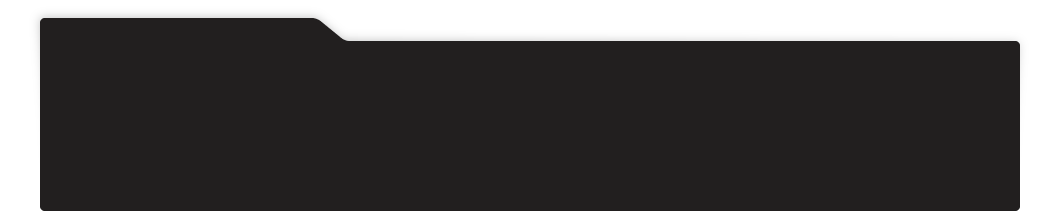
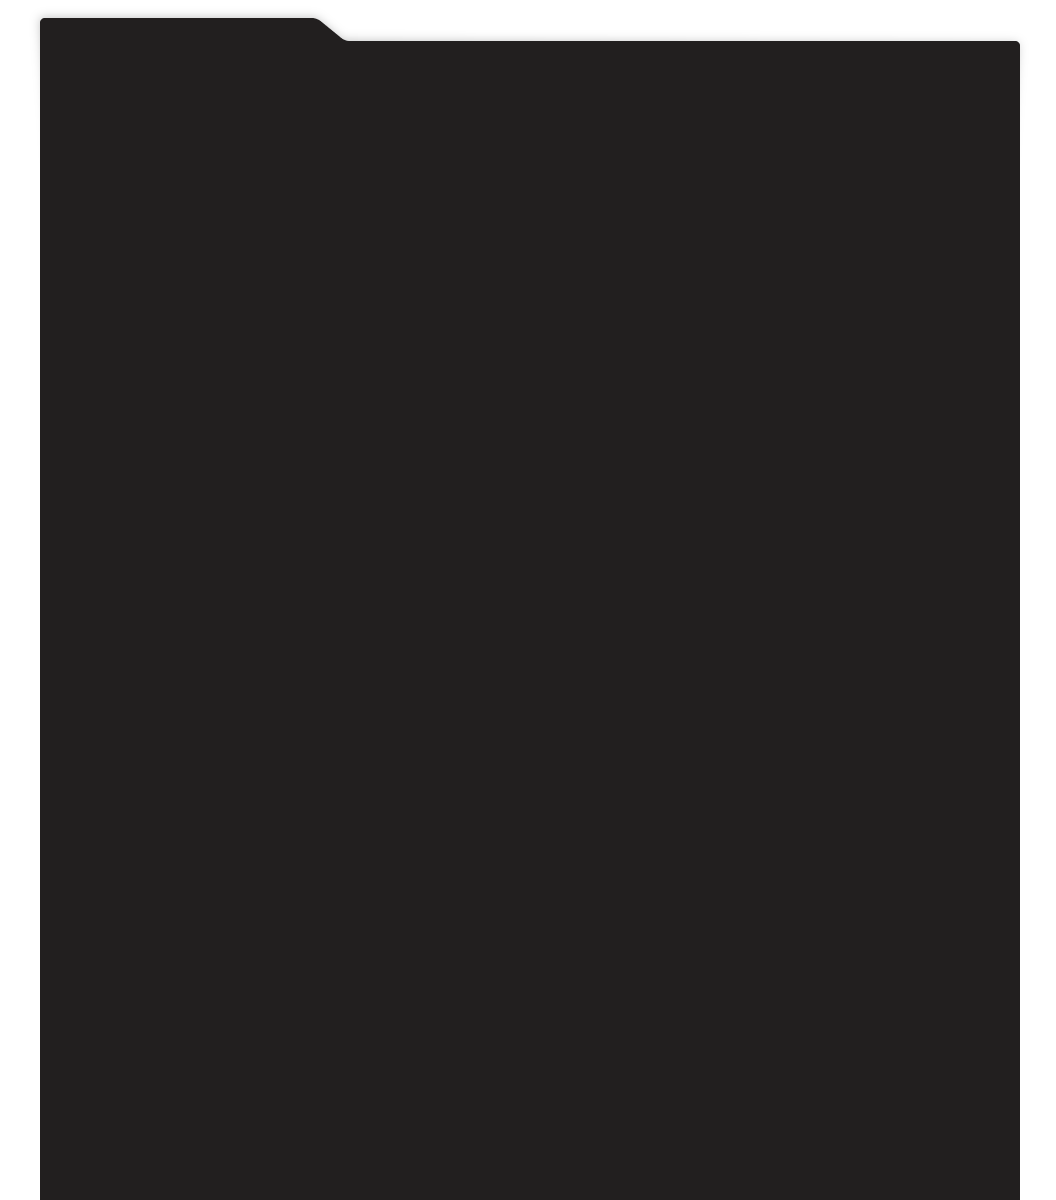
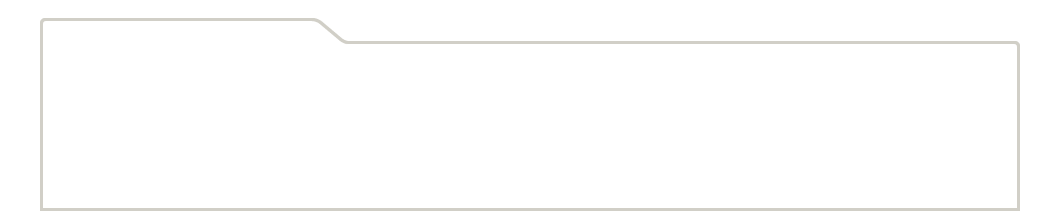
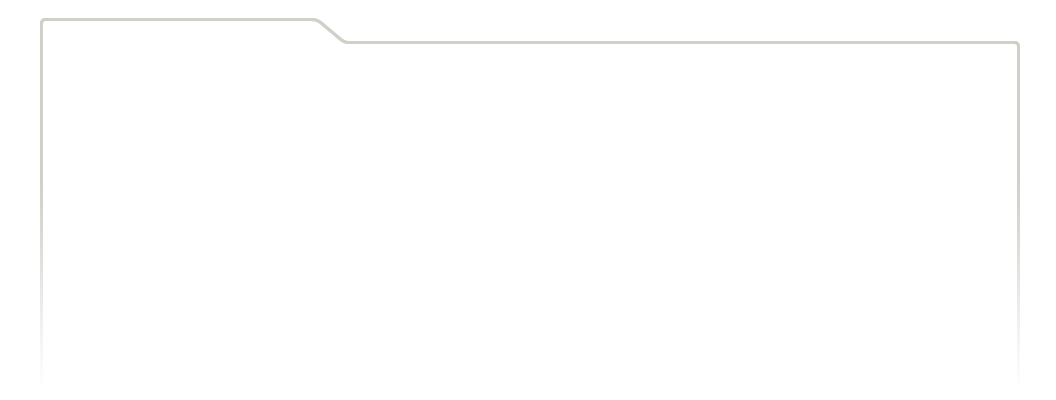
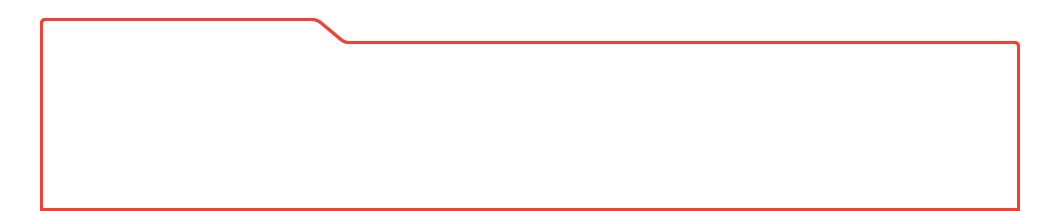
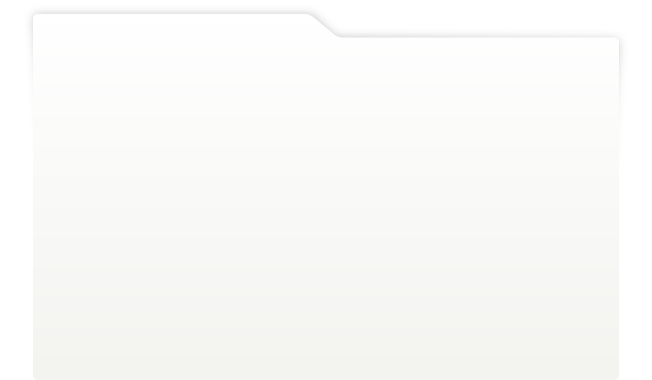
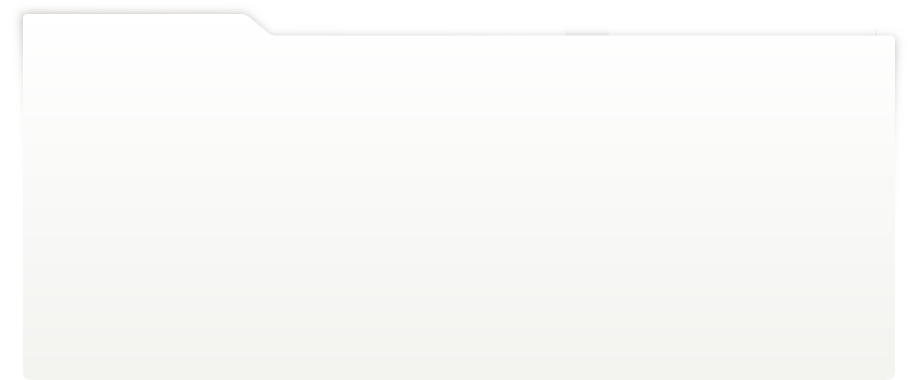
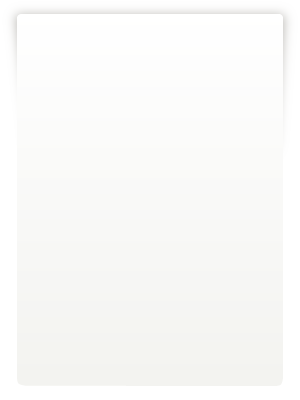
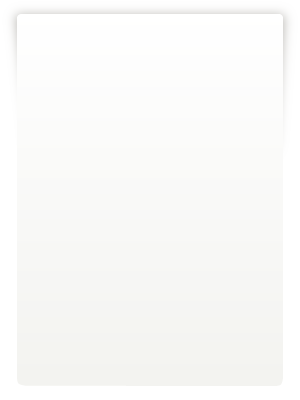
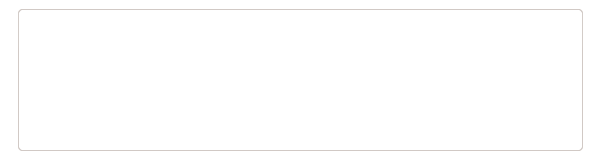
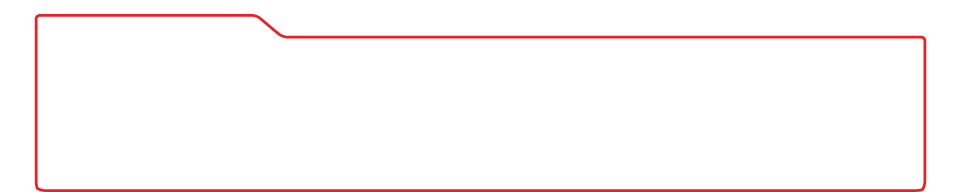
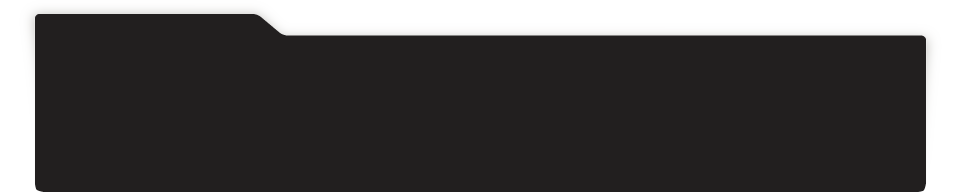
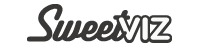
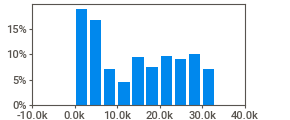
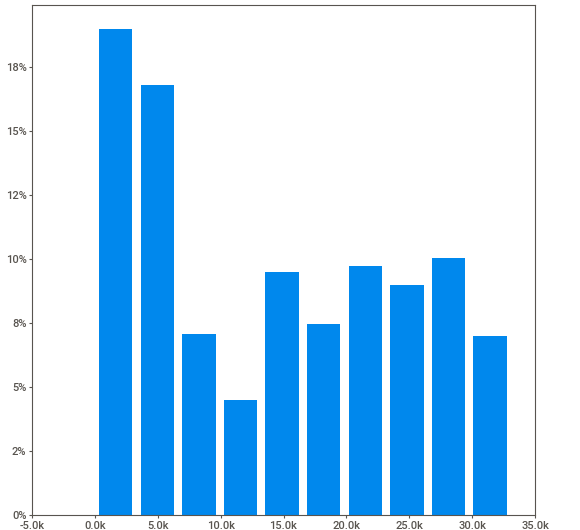
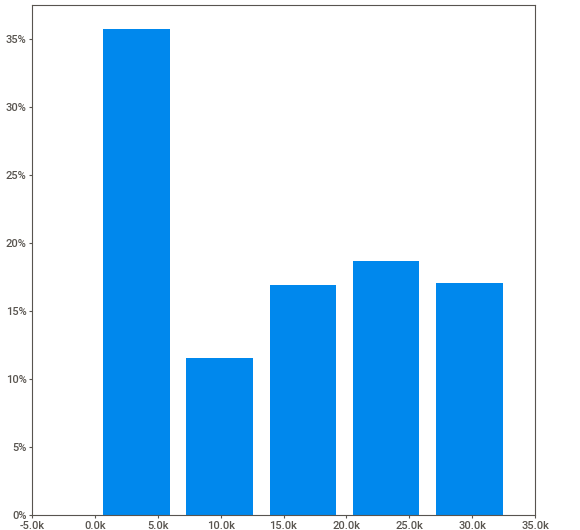
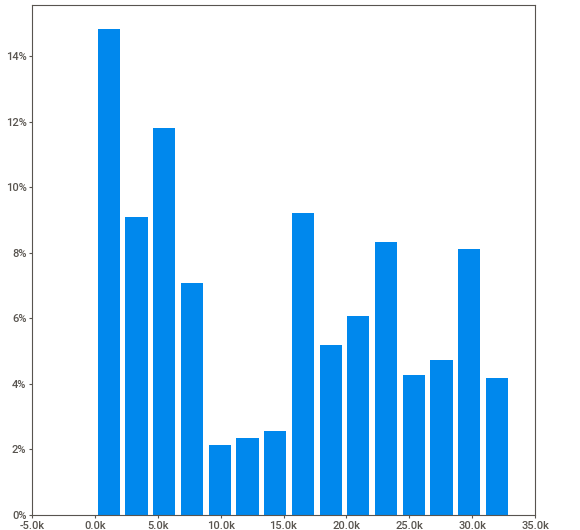
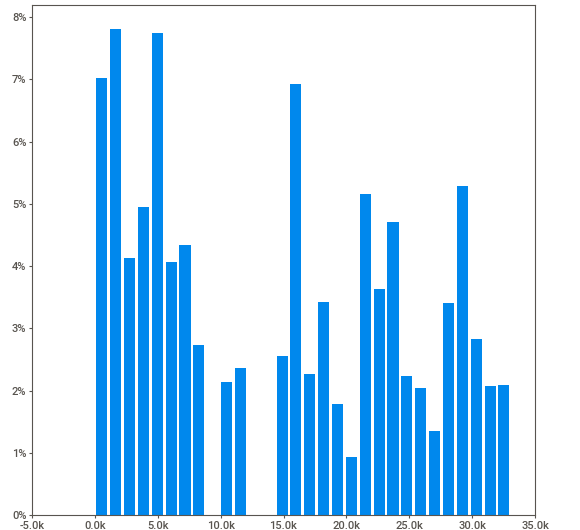
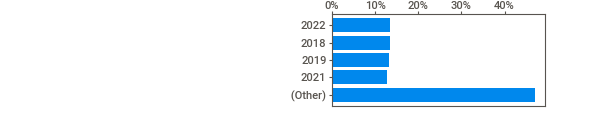
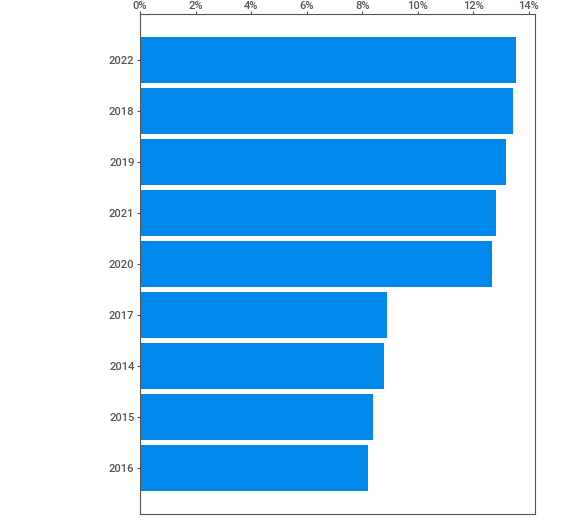
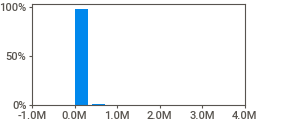
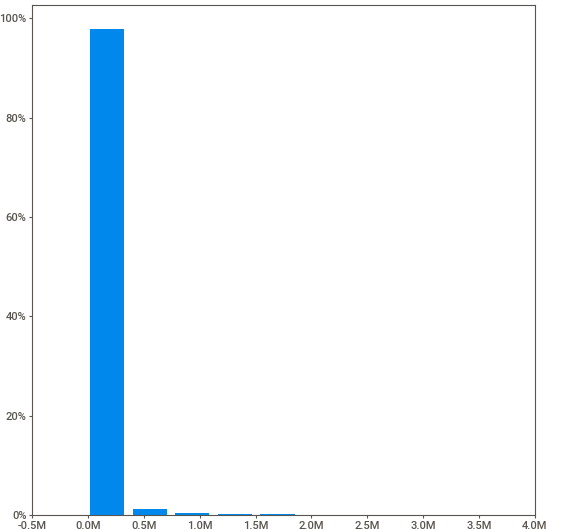
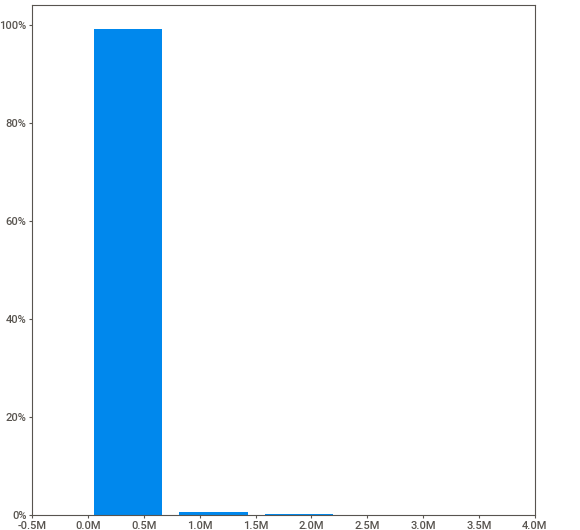
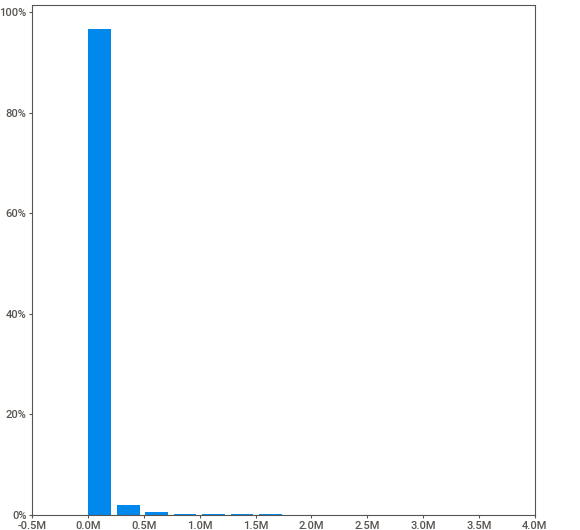
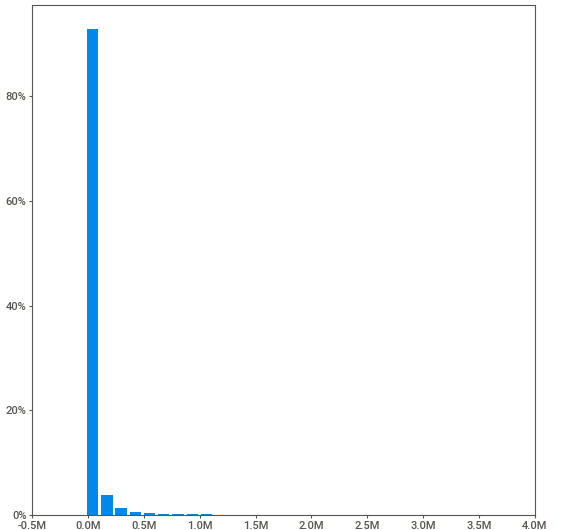
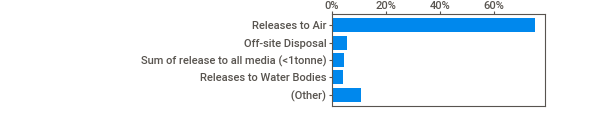
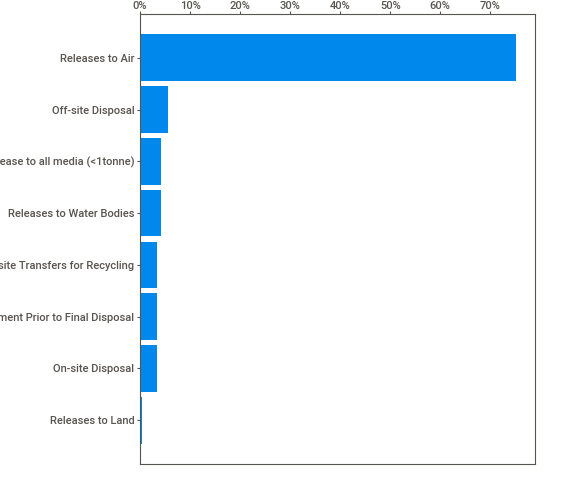
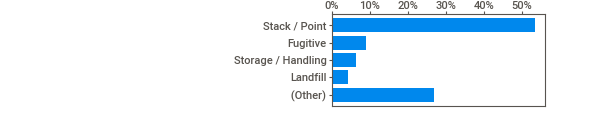
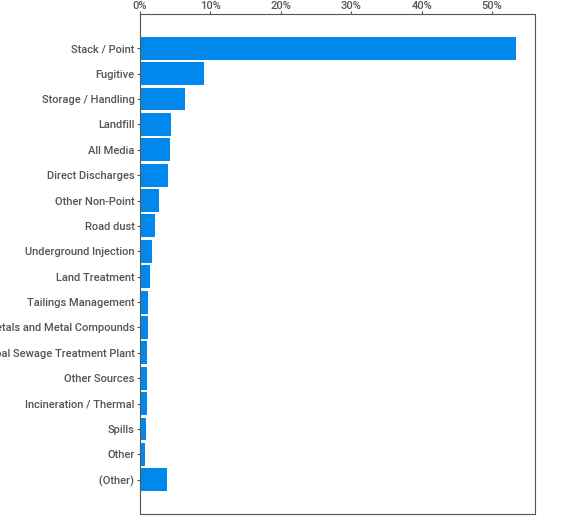
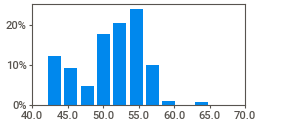
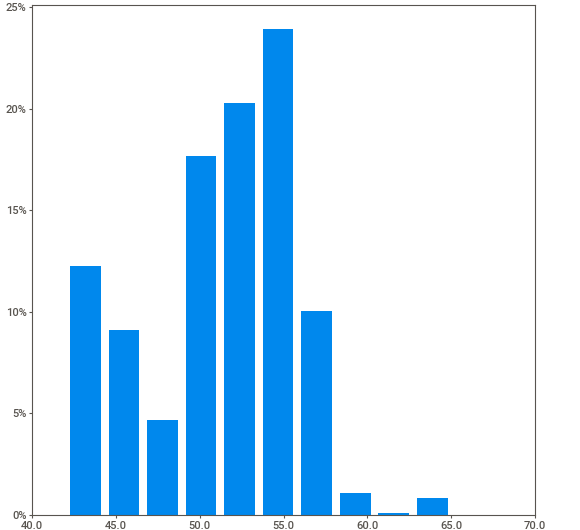
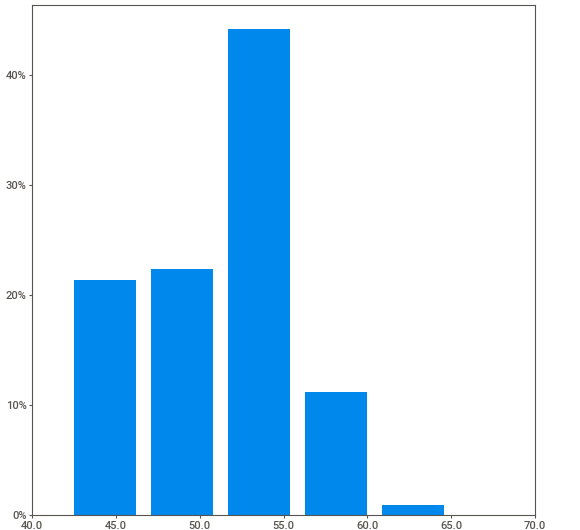
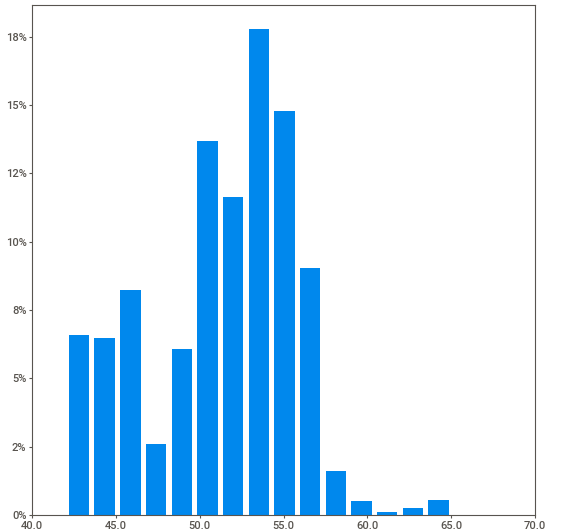
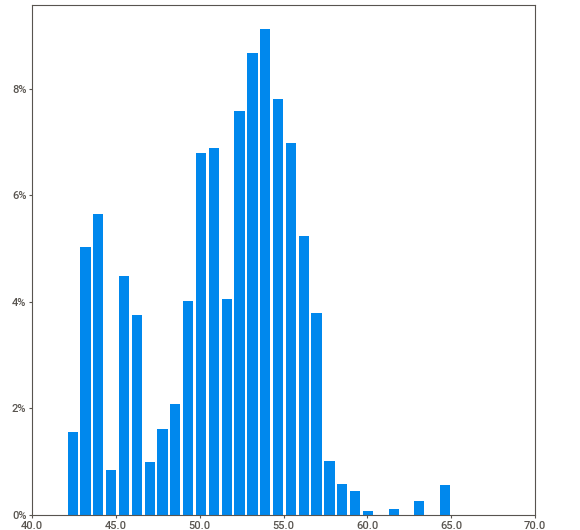
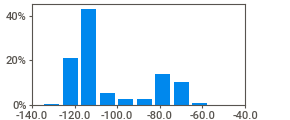
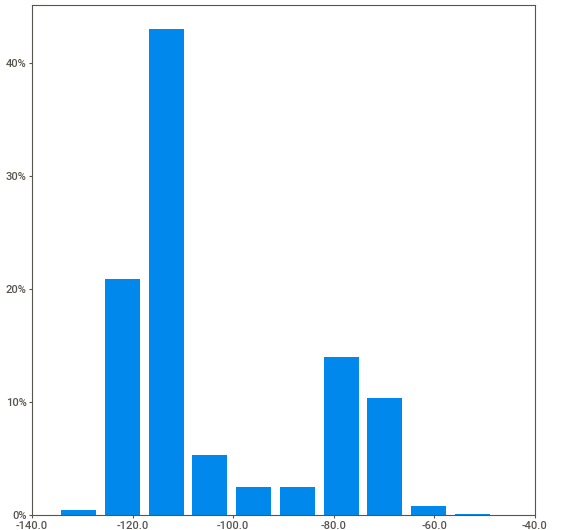
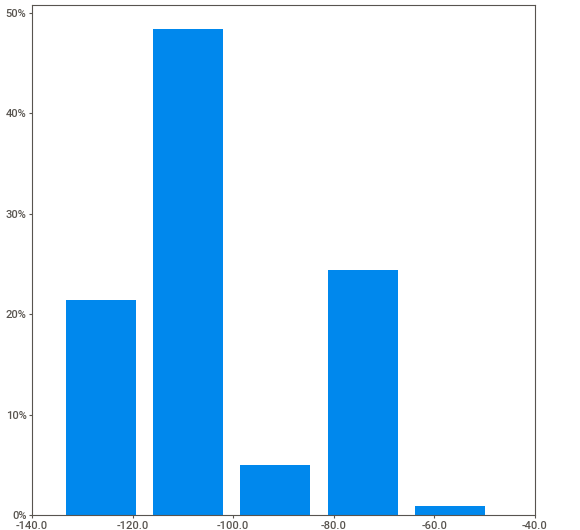
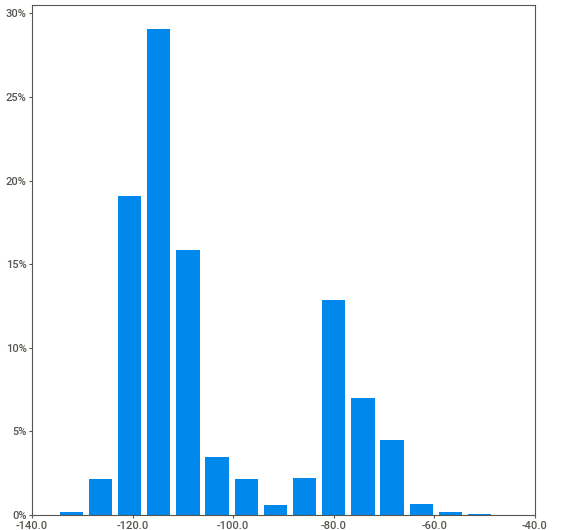
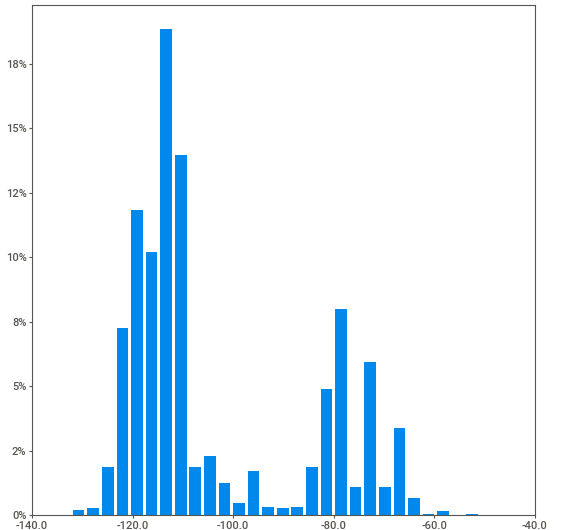
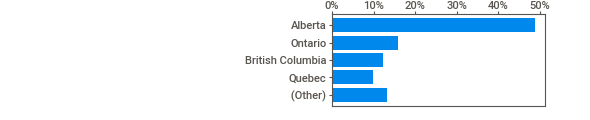
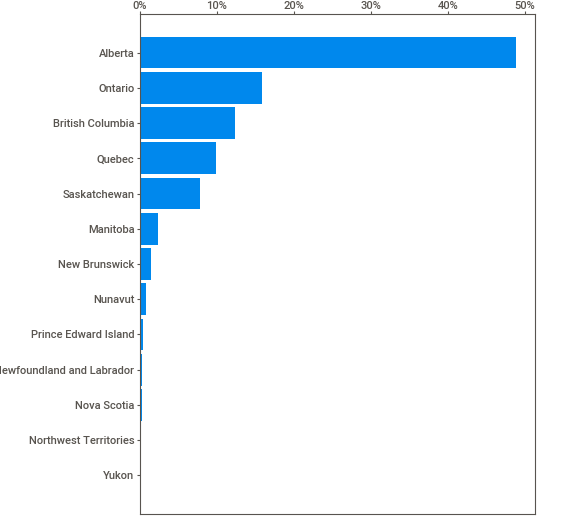
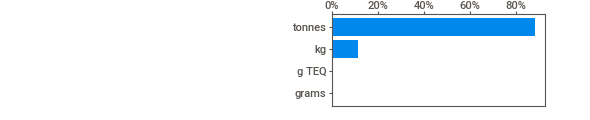
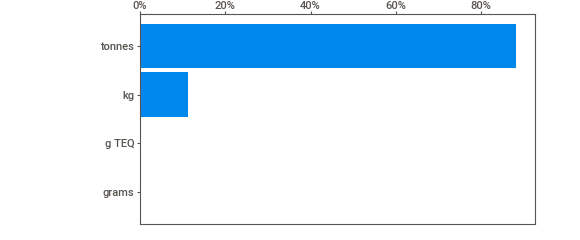
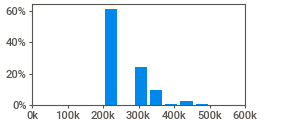
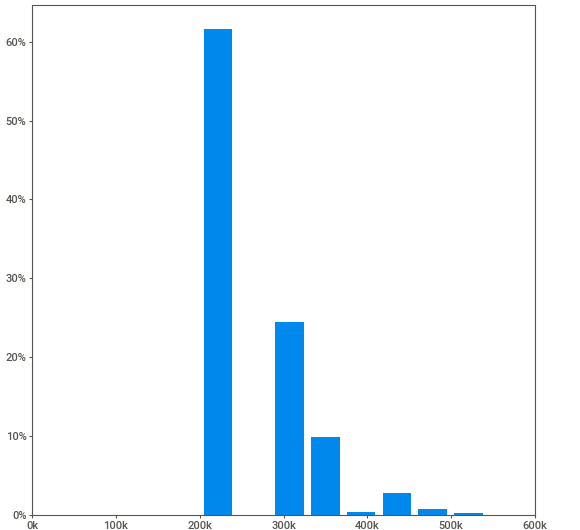
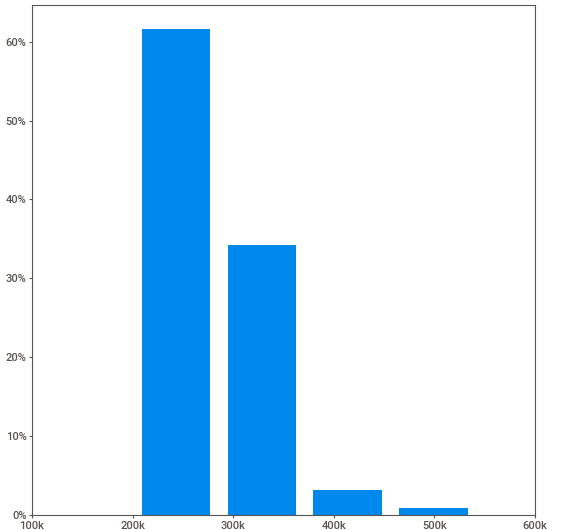
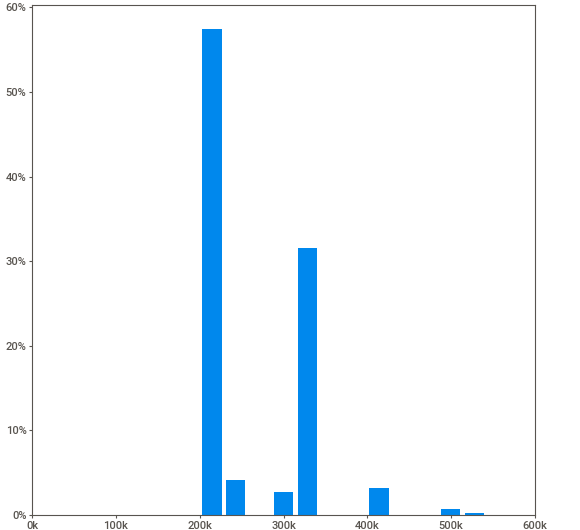
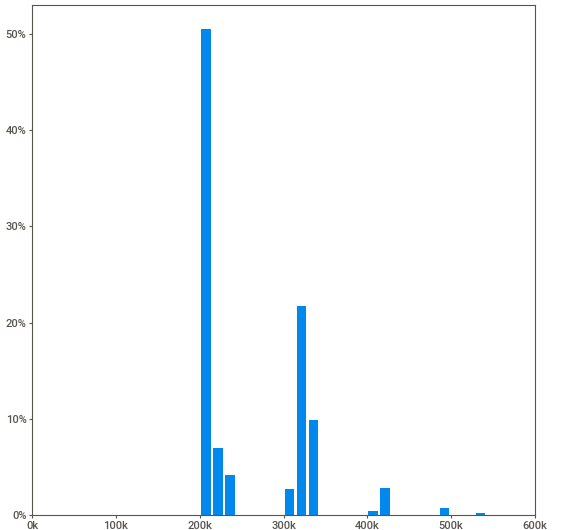
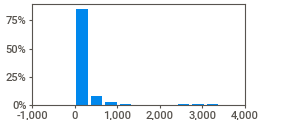
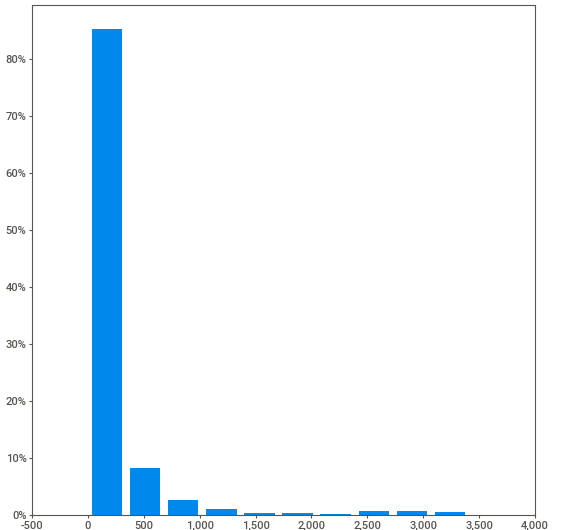
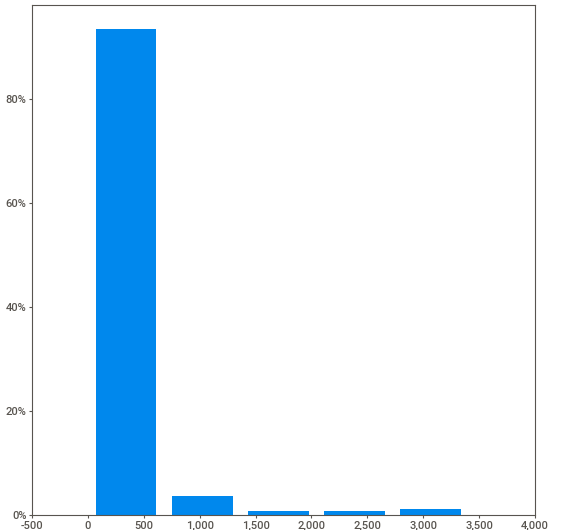
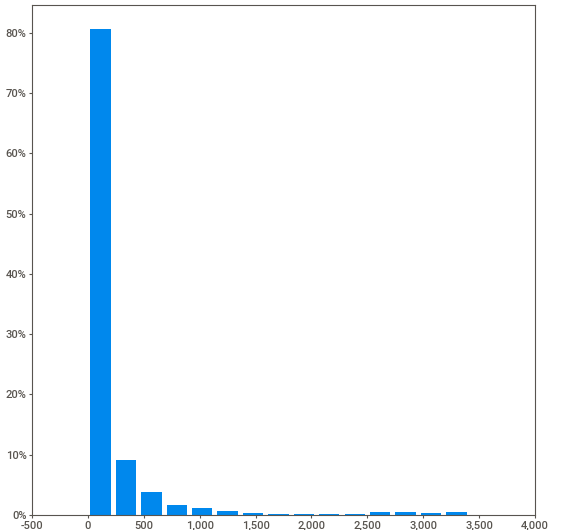
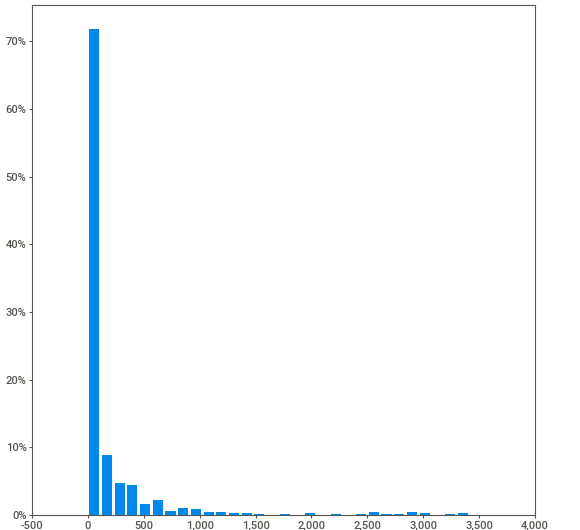
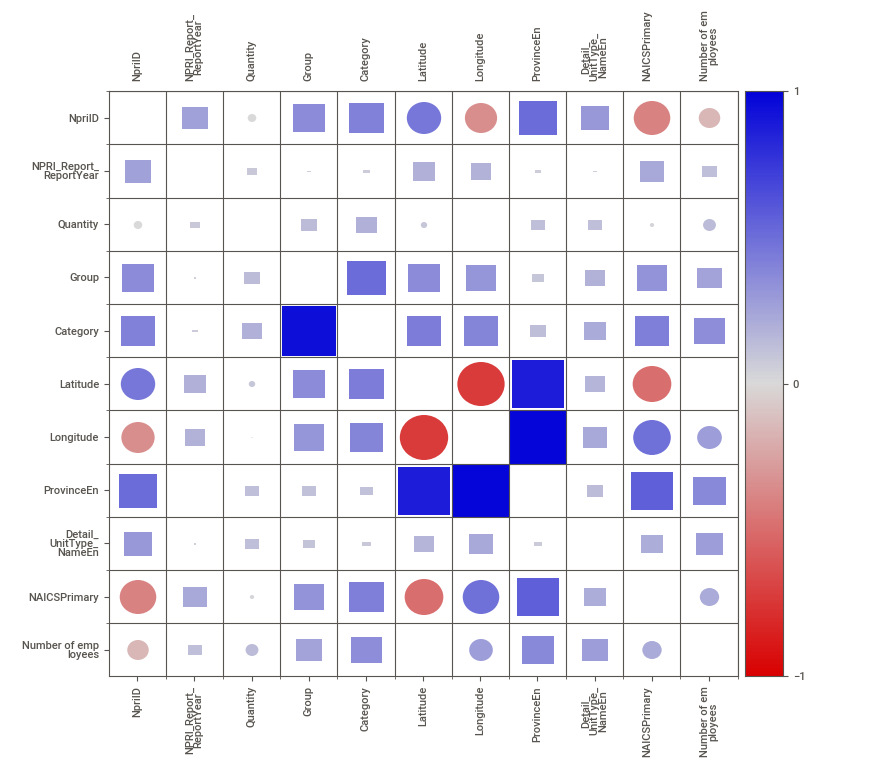
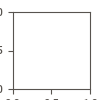

In [ ]:
# doing Auto EDA of columns
from IPython.display import HTML

# Load the Sweetviz report into an HTML object
html_report = open('sweetviz_report.html').read()

# Display the report in the notebook
HTML(html_report)


In [ ]:
#converting into csv to download
df_copy.to_csv('df_review.csv', index=False)

In [ ]:
# prompt: create map using latitude and longitude

import folium

# Initialize the map with a starting location and zoom level
map = folium.Map(location=[df_copy['Latitude'].mean(), df_copy['Longitude'].mean()], zoom_start=4)

# Add markers for each facility
for i in df_copy.index:
    marker = folium.Marker(
        location=[df_copy.loc[i, 'Latitude'], df_copy.loc[i, 'Longitude']],
        popup=df_copy.loc[i, 'FacilityName']
    )
    map.add_child(marker)

# Display the map
map
